In [1]:
!pip install gdown


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# import h5py
# import numpy as np

# # Paths to dataset and output
# dataset_path = "/kaggle/input/radioml2018/GOLD_XYZ_OSC.0001_1024.hdf5"
# positive_snr_path = "GOLD_XYZ_OSC_POSITIVE_FILTERED.hdf5"

# # Target modulation classes and all modulation classes
# target_classes = [
#     'BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-WC', 'AM-SSB-SC', 'FM', 'GMSK'
# ]
# all_classes = [
#     'OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK',
#     '16APSK', '32APSK', '64APSK', '128APSK', '16QAM', '32QAM',
#     '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC',
#     'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK'
# ]

# # Map target classes to their indices in all_classes
# class_indices_to_keep = [all_classes.index(cls) for cls in target_classes]
# class_mapping = {orig_idx: new_idx for new_idx, orig_idx in enumerate(class_indices_to_keep)}

# # SNR threshold
# snr_threshold = 0

# # Chunk size for processing
# chunk_size = 50000

# # Initialize storage for filtered data
# filtered_X = []
# filtered_Y = []
# filtered_Z = []

# # Process the dataset in chunks
# with h5py.File(dataset_path, 'r') as f:
#     num_samples = f['X'].shape[0]
#     X = f['X']
#     Y = f['Y']
#     Z = f['Z']

#     # Validate dimensions
#     assert X.shape[0] == Y.shape[0] == Z.shape[0], "Dimension mismatch in datasets"

#     for start_idx in range(0, num_samples, chunk_size):
#         end_idx = min(start_idx + chunk_size, num_samples)

#         # Load the chunk
#         X_chunk = X[start_idx:end_idx]
#         Y_chunk = Y[start_idx:end_idx]
#         Z_chunk = Z[start_idx:end_idx]

#         # Filter data in the chunk
#         for i in range(X_chunk.shape[0]):
#             orig_class_idx = np.argmax(Y_chunk[i])  # Extract the class index from one-hot encoding
#             snr = Z_chunk[i, 0]  # SNR value

#             if orig_class_idx in class_indices_to_keep and snr >= snr_threshold:
#                 filtered_X.append(X_chunk[i])
#                 filtered_Y.append(class_mapping[orig_class_idx])
#                 filtered_Z.append(Z_chunk[i])

# # Convert lists to numpy arrays
# filtered_X = np.array(filtered_X, dtype=np.float32)
# filtered_Y = np.array(filtered_Y, dtype=np.int32)
# filtered_Z = np.array(filtered_Z, dtype=np.float32)

# # Save the filtered dataset
# with h5py.File(positive_snr_path, 'w') as output_file:
#     output_file.create_dataset('X', data=filtered_X, compression='gzip')
#     output_file.create_dataset('Y', data=filtered_Y, compression='gzip')
#     output_file.create_dataset('Z', data=filtered_Z, compression='gzip')

# print("Filtered dataset saved to", positive_snr_path)


In [3]:
import numpy as np
from collections import defaultdict
import h5py
import pickle
from matplotlib import pyplot as plt


In [4]:
# filtered_data_path = "/kaggle/input/radioml-filtered/GOLD_XYZ_OSC_POSITIVE_FILTERED.hdf5"


# all_classes = [
#     'OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK',
#     '16APSK', '32APSK', '64APSK', '128APSK', '16QAM', '32QAM',
#     '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC',
#     'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK'
# ]

# # Plot constellation diagrams for the extracted dataset
# def plot_extracted_snr_levels(dataset_path, modulation_class_index, extracted_classes):
#     with h5py.File(dataset_path, 'r') as file:
#         X = file['X'][:]  # IQ samples
#         Y = file['Y'][:]  # Class indices (already mapped to contiguous indices)
#         Z = file['Z'][:]  # SNR values

#         # Get modulation class name from extracted_classes
#         class_name = extracted_classes[modulation_class_index]

#         # Find indices of the target modulation class
#         selected_class_indices = np.where(Y == modulation_class_index)[0]

#         # Get unique SNR levels
#         snr_values = np.unique(Z)

#         # Plot constellation diagrams for all SNR levels
#         plt.figure(figsize=(20, 16))
#         for i, snr in enumerate(snr_values):
#             # Find indices corresponding to the current SNR level
#             snr_indices = selected_class_indices[np.where(Z[selected_class_indices] == snr)[0]]

#             if len(snr_indices) == 0:
#                 continue

#             # Extract the first sample for the current SNR level
#             iq_samples = X[snr_indices[:10]]
#             # print(iq_samples.shape)
#             # break
#             # Separate into in-phase (I) and quadrature (Q) components
#             I = iq_samples[:, :, 0].flatten()
#             Q = iq_samples[:, :, 1].flatten()

#             # Plot the scatter plot
#             ax = plt.subplot(5, 6, i + 1)
#             ax.scatter(I, Q, s=5, alpha=0.8, color='black')
#             ax.set_title(f"SNR: {snr}dB", fontsize=10)
#             ax.axis('off')

#         plt.suptitle(f"Constellation Diagrams for Class {class_name}", fontsize=16)
#         plt.tight_layout()
#         plt.subplots_adjust(top=0.95)
#         plt.show()


# # Paths to extracted dataset and relevant parameters
# extracted_classes = [
#     'BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK'
# ]

# # Plot for the target class index (modulation class index in extracted_classes)
# modulation_class_index = 0  # Example: 'FM'

# plot_extracted_snr_levels(filtered_data_path, modulation_class_index, extracted_classes)

In [5]:
# modulation_schemes = ['BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK']
# orig_mapped_classes_index = {
#     'BPSK': 0,
#     'QPSK': 1,
#     '8PSK': 2,
#     '16QAM': 3,
#     '64QAM': 4,
#     'AM-DSB-SC': 5,
#     'AM-SSB-SC': 6,
#     'GMSK': 8,
#     'FM': 7,
# }
# gen_mapped_classes_index = {
#     'BPSK': 0,
#     'QPSK': 1,
#     '8PSK': 2,
#     'QAM16': 3,
#     'QAM64': 4,
#     'GFSK': 5,
#     'WBFM': 6,
#     'AM-DSB': 7,
#     'AM-SSB': 8
# }
# # data_orig = defaultdict(list)

# # Z = Z.flatten()

# # j = 0
# # for i in range(X.shape[0]):
# #     modulation = orig_mapped_classes[Y[i]]
# #     snr = Z[i]
# #     data_orig[(modulation, snr)].append(X[i])
# #     j += 1
# # print(j)


# # for key in data_orig.keys():
# #     data_orig[key] = np.array(data_orig[key])

# # data_orig = dict(data_orig)

# # print("Keys in data_orig:", data_orig.keys())
# # print("Shape of one example dataset:", data_orig[('BPSK', 0)].shape)

# # with open(positive_snr_dict, "wb") as f:
# #     pickle.dump(data_orig, f)

# positive_snr_dict = "GOLD_XYZ_OSC_POSITIVE_FILTERED_DICT"
# positive_snr_path = "/kaggle/working/GOLD_XYZ_OSC_POSITIVE_FILTERED.hdf5"


# # Load filtered dataset
# with h5py.File(positive_snr_path, 'r') as f:
#     X = f['X'][:]  # IQ samples
#     Y = f['Y'][:]  # Modulation class indices
#     Z = f['Z'][:]  # SNR values

# print("X shape:", X.shape)
# print("Y shape:", Y.shape)
# print("Z shape:", Z.shape)

# # Mappings for modulation classes
# orig_mapped_classes = {
#     0: 'BPSK',
#     1: 'QPSK',
#     2: '8PSK',
#     3: '16QAM',
#     4: '64QAM',
#     5: 'AM-DSB-SC',
#     6: 'AM-SSB-SC',
#     7: 'FM',
#     8: 'GMSK'
# }

# # Flatten SNR array if necessary
# Z = Z.flatten()

# # Initialize dictionary
# data_orig = defaultdict(list)

# # Populate dictionary
# for i in range(X.shape[0]):
#     modulation = orig_mapped_classes[Y[i]]  # Get modulation class name
#     snr = Z[i]  # SNR value
#     data_orig[(modulation, snr)].append(X[i])  # Add IQ sample to the dictionary
# # Convert lists to numpy arrays
# for key in data_orig.keys():
#     data_orig[key] = np.array(data_orig[key])

# # Verify dictionary structure
# print("Total keys in data_orig:", len(data_orig))
# for key, value in list(data_orig.items())[:5]:  # Show first 5 keys for validation
#     print(f"Key: {key}, Shape: {value.shape}")

# # Save the dictionary as a pickle file
# with open(positive_snr_dict, "wb") as f:
#     pickle.dump(dict(data_orig), f)

# print(f"Dictionary saved to {positive_snr_dict}")


In [6]:
# ############################## PLOTTING TO CHECK THE ORIGINAL DATA #############################
# #############################################################################################

# with open("/kaggle/input/radioml-filtered/GOLD_XYZ_OSC_POSITIVE_FILTERED_DICT", 'rb') as f:
#     data_filtered = pickle.load(f, encoding='latin1')

# def plot_constellation(modulation_class, snr_list, data):
#     plt.figure(figsize=(20, 16))
#     for i, snr in enumerate(snr_list):
#         key = (modulation_class, snr)
#         if key in data:
#             values = data[key]
#             # print(values.shape)
#             # break
#             I_values = values[:10, :, 0].flatten()  # for one instance change the x index
#             Q_values = values[:10, :, 1].flatten()

#             ax = plt.subplot(5, 4, i + 1)
#             ax.scatter(I_values, Q_values, s=5, alpha=0.8, color='black', label=f'SNR: {snr} dB')
#             ax.set_title(f"{modulation_class} at SNR {snr} dB", fontsize=12)
#             ax.set_ylabel("Quadrature (Q)", fontsize=10)
#             ax.grid(True, linestyle='--', alpha=0.6)
#             ax.legend(fontsize=9, loc='upper right')
#         else:
#             print(f"Key {key} not found in data.")

#     plt.suptitle(f"Constellation Diagrams for {modulation_class}", fontsize=16)
#     plt.subplots_adjust(top=0.95)
#     plt.tight_layout()
#     plt.show()


# mod_class = 'BPSK'
# snr_values = [0, 10, 20, 30]
# plot_constellation(mod_class, snr_values, data_filtered)

In [7]:
import h5py
import numpy as np
import pickle

# File paths
gen_dataset_awgn = "/kaggle/input/radioml/RML25AWGN"
gen_dataset_clean = "/kaggle/input/radioml/RML25CLEAN"
positive_snr_dict = "/kaggle/input/radioml-filtered/GOLD_XYZ_OSC_POSITIVE_FILTERED_DICT"


with open(positive_snr_dict, "rb") as f:
    data_orig = pickle.load(f, encoding="latin1")

with open(gen_dataset_awgn, "rb") as f:
    data_awgn = pickle.load(f, encoding='latin1')
    print(data_awgn.keys())

with open(gen_dataset_clean, "rb") as f:
    data_clean = pickle.load(f, encoding='latin1')
    print(data_clean.keys())


dict_keys([('BPSK', 0), ('BPSK', 2), ('BPSK', 4), ('BPSK', 6), ('BPSK', 8), ('BPSK', 10), ('BPSK', 12), ('BPSK', 14), ('BPSK', 16), ('BPSK', 18), ('BPSK', 20), ('BPSK', 22), ('BPSK', 24), ('BPSK', 26), ('BPSK', 28), ('BPSK', 30), ('QPSK', 0), ('QPSK', 2), ('QPSK', 4), ('QPSK', 6), ('QPSK', 8), ('QPSK', 10), ('QPSK', 12), ('QPSK', 14), ('QPSK', 16), ('QPSK', 18), ('QPSK', 20), ('QPSK', 22), ('QPSK', 24), ('QPSK', 26), ('QPSK', 28), ('QPSK', 30), ('8PSK', 0), ('8PSK', 2), ('8PSK', 4), ('8PSK', 6), ('8PSK', 8), ('8PSK', 10), ('8PSK', 12), ('8PSK', 14), ('8PSK', 16), ('8PSK', 18), ('8PSK', 20), ('8PSK', 22), ('8PSK', 24), ('8PSK', 26), ('8PSK', 28), ('8PSK', 30), ('QAM16', 0), ('QAM16', 2), ('QAM16', 4), ('QAM16', 6), ('QAM16', 8), ('QAM16', 10), ('QAM16', 12), ('QAM16', 14), ('QAM16', 16), ('QAM16', 18), ('QAM16', 20), ('QAM16', 22), ('QAM16', 24), ('QAM16', 26), ('QAM16', 28), ('QAM16', 30), ('QAM64', 0), ('QAM64', 2), ('QAM64', 4), ('QAM64', 6), ('QAM64', 8), ('QAM64', 10), ('QAM64', 12

dict_keys([('BPSK', 0), ('BPSK', 2), ('BPSK', 4), ('BPSK', 6), ('BPSK', 8), ('BPSK', 10), ('BPSK', 12), ('BPSK', 14), ('BPSK', 16), ('BPSK', 18), ('BPSK', 20), ('BPSK', 22), ('BPSK', 24), ('BPSK', 26), ('BPSK', 28), ('BPSK', 30), ('QPSK', 0), ('QPSK', 2), ('QPSK', 4), ('QPSK', 6), ('QPSK', 8), ('QPSK', 10), ('QPSK', 12), ('QPSK', 14), ('QPSK', 16), ('QPSK', 18), ('QPSK', 20), ('QPSK', 22), ('QPSK', 24), ('QPSK', 26), ('QPSK', 28), ('QPSK', 30), ('8PSK', 0), ('8PSK', 2), ('8PSK', 4), ('8PSK', 6), ('8PSK', 8), ('8PSK', 10), ('8PSK', 12), ('8PSK', 14), ('8PSK', 16), ('8PSK', 18), ('8PSK', 20), ('8PSK', 22), ('8PSK', 24), ('8PSK', 26), ('8PSK', 28), ('8PSK', 30), ('QAM16', 0), ('QAM16', 2), ('QAM16', 4), ('QAM16', 6), ('QAM16', 8), ('QAM16', 10), ('QAM16', 12), ('QAM16', 14), ('QAM16', 16), ('QAM16', 18), ('QAM16', 20), ('QAM16', 22), ('QAM16', 24), ('QAM16', 26), ('QAM16', 28), ('QAM16', 30), ('QAM64', 0), ('QAM64', 2), ('QAM64', 4), ('QAM64', 6), ('QAM64', 8), ('QAM64', 10), ('QAM64', 12

In [8]:
for modulation, snr in list(data_awgn.keys()):
    if modulation == "QAM16":
        data_awgn[("16QAM", snr)] = data_awgn.pop((modulation, snr))
        data_clean[("16QAM", snr)] = data_clean.pop((modulation, snr))
    elif modulation == "QAM64":
        data_awgn[("64QAM", snr)] = data_awgn.pop((modulation, snr))
        data_clean[("64QAM", snr)] = data_clean.pop((modulation, snr))
    elif modulation == "GFSK":
        data_awgn[("GMSK", snr)] = data_awgn.pop((modulation, snr))
        data_clean[("GMSK", snr)] = data_clean.pop((modulation, snr))
    elif modulation == "WBFM":
        data_awgn[("FM", snr)] = data_awgn.pop((modulation, snr))
        data_clean[("FM", snr)] = data_clean.pop((modulation, snr))
    elif modulation == "AM-SSB":
        data_awgn[("AM-SSB-SC", snr)] = data_awgn.pop((modulation, snr))
        data_clean[("AM-SSB-SC", snr)] = data_clean.pop((modulation, snr))
    elif modulation == "AM-DSB":
        data_awgn[("AM-DSB-SC", snr)] = data_awgn.pop((modulation, snr))
        data_clean[("AM-DSB-SC", snr)] = data_clean.pop((modulation, snr))

In [9]:
print(data_awgn.keys())
print(data_clean.keys())
print(data_orig.keys())


dict_keys([('BPSK', 0), ('BPSK', 2), ('BPSK', 4), ('BPSK', 6), ('BPSK', 8), ('BPSK', 10), ('BPSK', 12), ('BPSK', 14), ('BPSK', 16), ('BPSK', 18), ('BPSK', 20), ('BPSK', 22), ('BPSK', 24), ('BPSK', 26), ('BPSK', 28), ('BPSK', 30), ('QPSK', 0), ('QPSK', 2), ('QPSK', 4), ('QPSK', 6), ('QPSK', 8), ('QPSK', 10), ('QPSK', 12), ('QPSK', 14), ('QPSK', 16), ('QPSK', 18), ('QPSK', 20), ('QPSK', 22), ('QPSK', 24), ('QPSK', 26), ('QPSK', 28), ('QPSK', 30), ('8PSK', 0), ('8PSK', 2), ('8PSK', 4), ('8PSK', 6), ('8PSK', 8), ('8PSK', 10), ('8PSK', 12), ('8PSK', 14), ('8PSK', 16), ('8PSK', 18), ('8PSK', 20), ('8PSK', 22), ('8PSK', 24), ('8PSK', 26), ('8PSK', 28), ('8PSK', 30), ('16QAM', 0), ('16QAM', 2), ('16QAM', 4), ('16QAM', 6), ('16QAM', 8), ('16QAM', 10), ('16QAM', 12), ('16QAM', 14), ('16QAM', 16), ('16QAM', 18), ('16QAM', 20), ('16QAM', 22), ('16QAM', 24), ('16QAM', 26), ('16QAM', 28), ('16QAM', 30), ('64QAM', 0), ('64QAM', 2), ('64QAM', 4), ('64QAM', 6), ('64QAM', 8), ('64QAM', 10), ('64QAM', 12

In [10]:
import numpy as np
for modulation, snr in list(data_clean.keys()):
    new_key = (modulation, 9999)
    
    # If the new key already exists, append the values; otherwise, create it
    if new_key in data_clean:
        data_clean[new_key] = np.concatenate((data_clean[new_key], data_clean.pop((modulation, snr))), axis=0)
    else:
        data_clean[new_key] = data_clean.pop((modulation, snr))

In [11]:
for key, values in data_awgn.items():
    data_awgn[key] = np.transpose(np.array(values), (0, 2, 1))

for key, values in data_clean.items():
    data_clean[key] = np.transpose(np.array(values), (0, 2, 1))

print(data_clean['BPSK', 9999].shape)

(16000, 1024, 2)


In [12]:
print(data_clean['BPSK', 9999].shape)

(16000, 1024, 2)


In [13]:
for key, value in data_awgn.items():
    if key in data_orig:
        # Merge values if the key exists in both dictionaries
        data_orig[key] = np.concatenate((data_orig[key], value), axis=0)
    else:
        # Add the key-value pair if it doesn't exist
        data_orig[key] = value
print(data_orig['BPSK', 0].shape)

(5096, 1024, 2)


In [14]:
data_clean_new = {}

for key, value in data_clean.items():
    data_clean_new[key] = value[:5096]

In [15]:
print(data_clean_new['BPSK', 9999].shape)

(5096, 1024, 2)


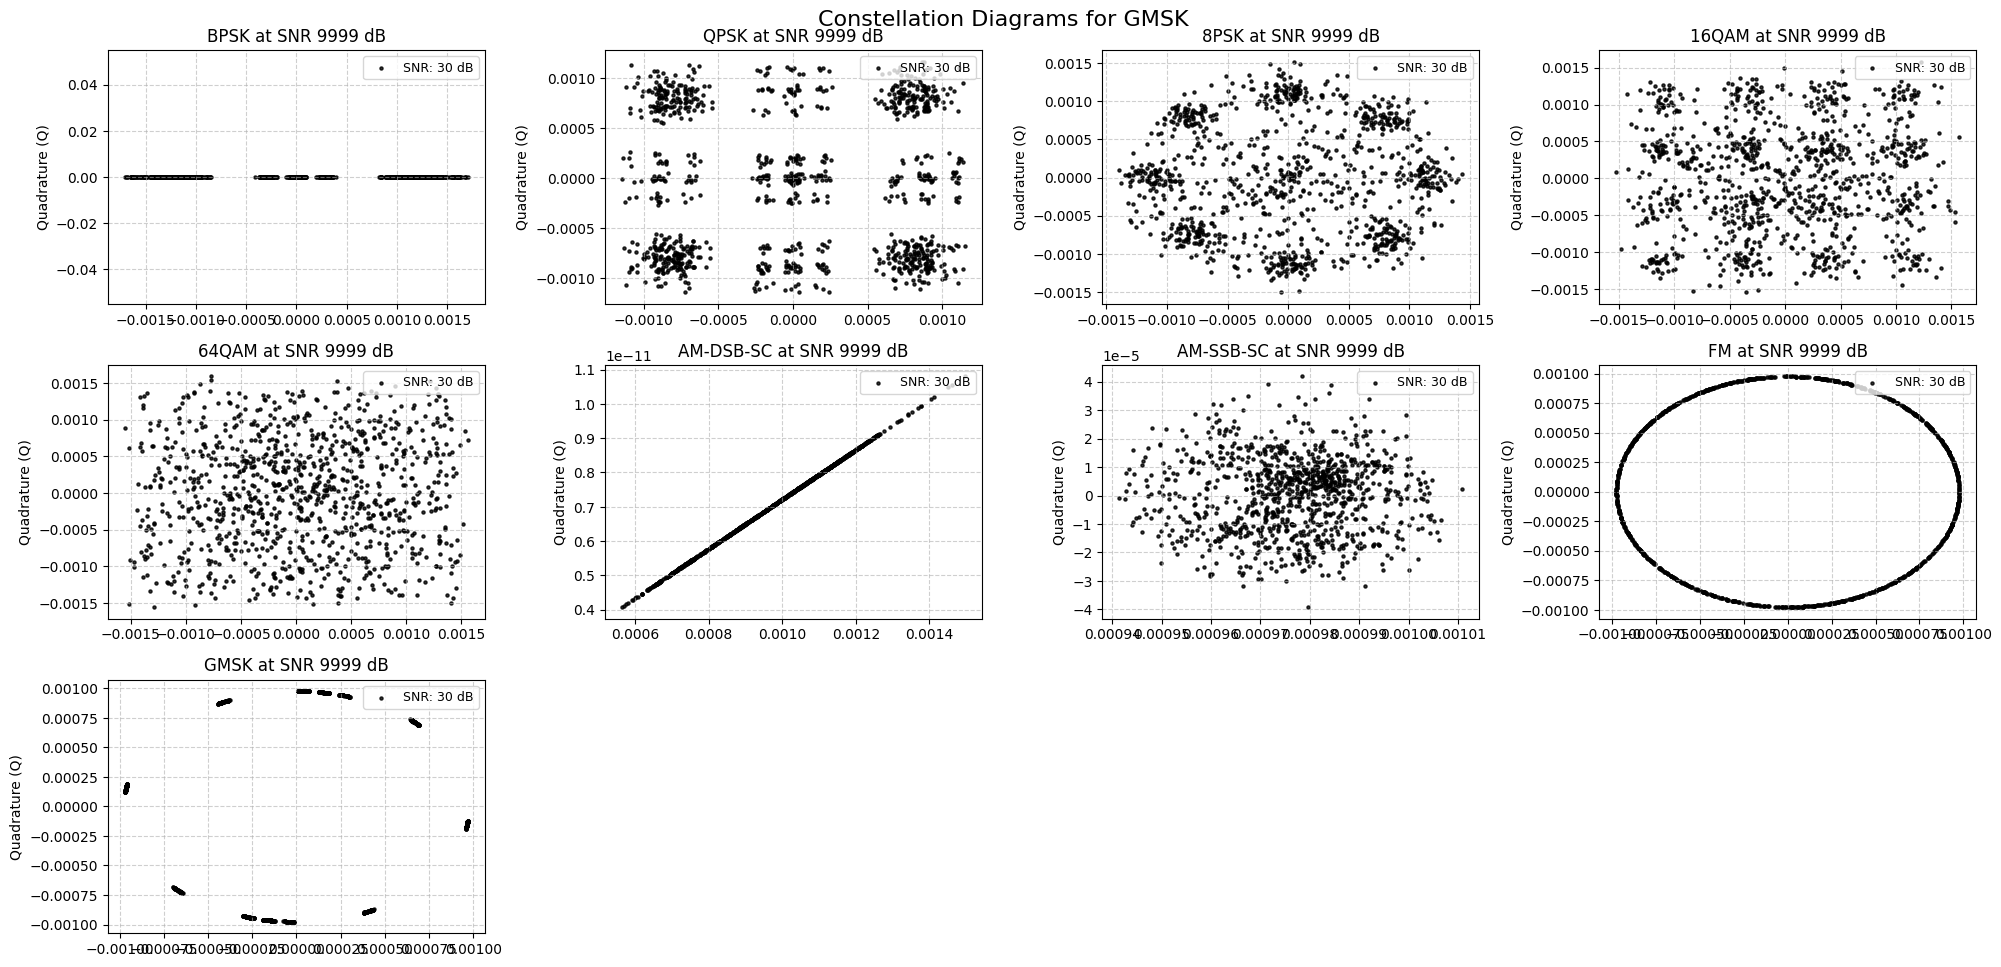

In [16]:
############################## PLOTTING TO CHECK THE CLEAN DATA #############################
#############################################################################################
############################## PLOTTING TO CHECK THE ORIGINAL DATA #############################
#############################################################################################
from matplotlib import pyplot as plt

def plot_constellation(modulation_classes, snr_value, data):
    plt.figure(figsize=(20, 16))
    for i, modulation_class in enumerate(modulation_classes):
        key = (modulation_class, snr_value)
        if key in data:
            values = data[key]
            # print(values.shape)
            # break
            I_values = values[:1, :, 0].flatten()  # for one instance change the x index
            Q_values = values[:1, :, 1].flatten()

            ax = plt.subplot(5, 4, i + 1)
            ax.scatter(I_values, Q_values, s=5, alpha=0.8, color='black', label=f'SNR: {snr} dB')
            ax.set_title(f"{modulation_class} at SNR {snr_value} dB", fontsize=12)
            ax.set_ylabel("Quadrature (Q)", fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend(fontsize=9, loc='upper right')
        else:
            print(f"Key {key} not found in data.")

    plt.suptitle(f"Constellation Diagrams for {modulation_class}", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.tight_layout()
    plt.show()


mod_class = ['BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK']
snr_values = 9999
plot_constellation(mod_class, snr_values, data_clean_new)

In [17]:
for key, value in data_clean_new.items():
    if key in data_orig:
        # Merge values if the key exists in both dictionaries
        data_orig[key] = np.concatenate((data_orig[key], value), axis=0)
    else:
        # Add the key-value pair if it doesn't exist
        data_orig[key] = value
print(data_orig.keys())

dict_keys([('BPSK', np.float32(0.0)), ('BPSK', np.float32(2.0)), ('BPSK', np.float32(4.0)), ('BPSK', np.float32(6.0)), ('BPSK', np.float32(8.0)), ('BPSK', np.float32(10.0)), ('BPSK', np.float32(12.0)), ('BPSK', np.float32(14.0)), ('BPSK', np.float32(16.0)), ('BPSK', np.float32(18.0)), ('BPSK', np.float32(20.0)), ('BPSK', np.float32(22.0)), ('BPSK', np.float32(24.0)), ('BPSK', np.float32(26.0)), ('BPSK', np.float32(28.0)), ('BPSK', np.float32(30.0)), ('QPSK', np.float32(0.0)), ('QPSK', np.float32(2.0)), ('QPSK', np.float32(4.0)), ('QPSK', np.float32(6.0)), ('QPSK', np.float32(8.0)), ('QPSK', np.float32(10.0)), ('QPSK', np.float32(12.0)), ('QPSK', np.float32(14.0)), ('QPSK', np.float32(16.0)), ('QPSK', np.float32(18.0)), ('QPSK', np.float32(20.0)), ('QPSK', np.float32(22.0)), ('QPSK', np.float32(24.0)), ('QPSK', np.float32(26.0)), ('QPSK', np.float32(28.0)), ('QPSK', np.float32(30.0)), ('8PSK', np.float32(0.0)), ('8PSK', np.float32(2.0)), ('8PSK', np.float32(4.0)), ('8PSK', np.float32(6.

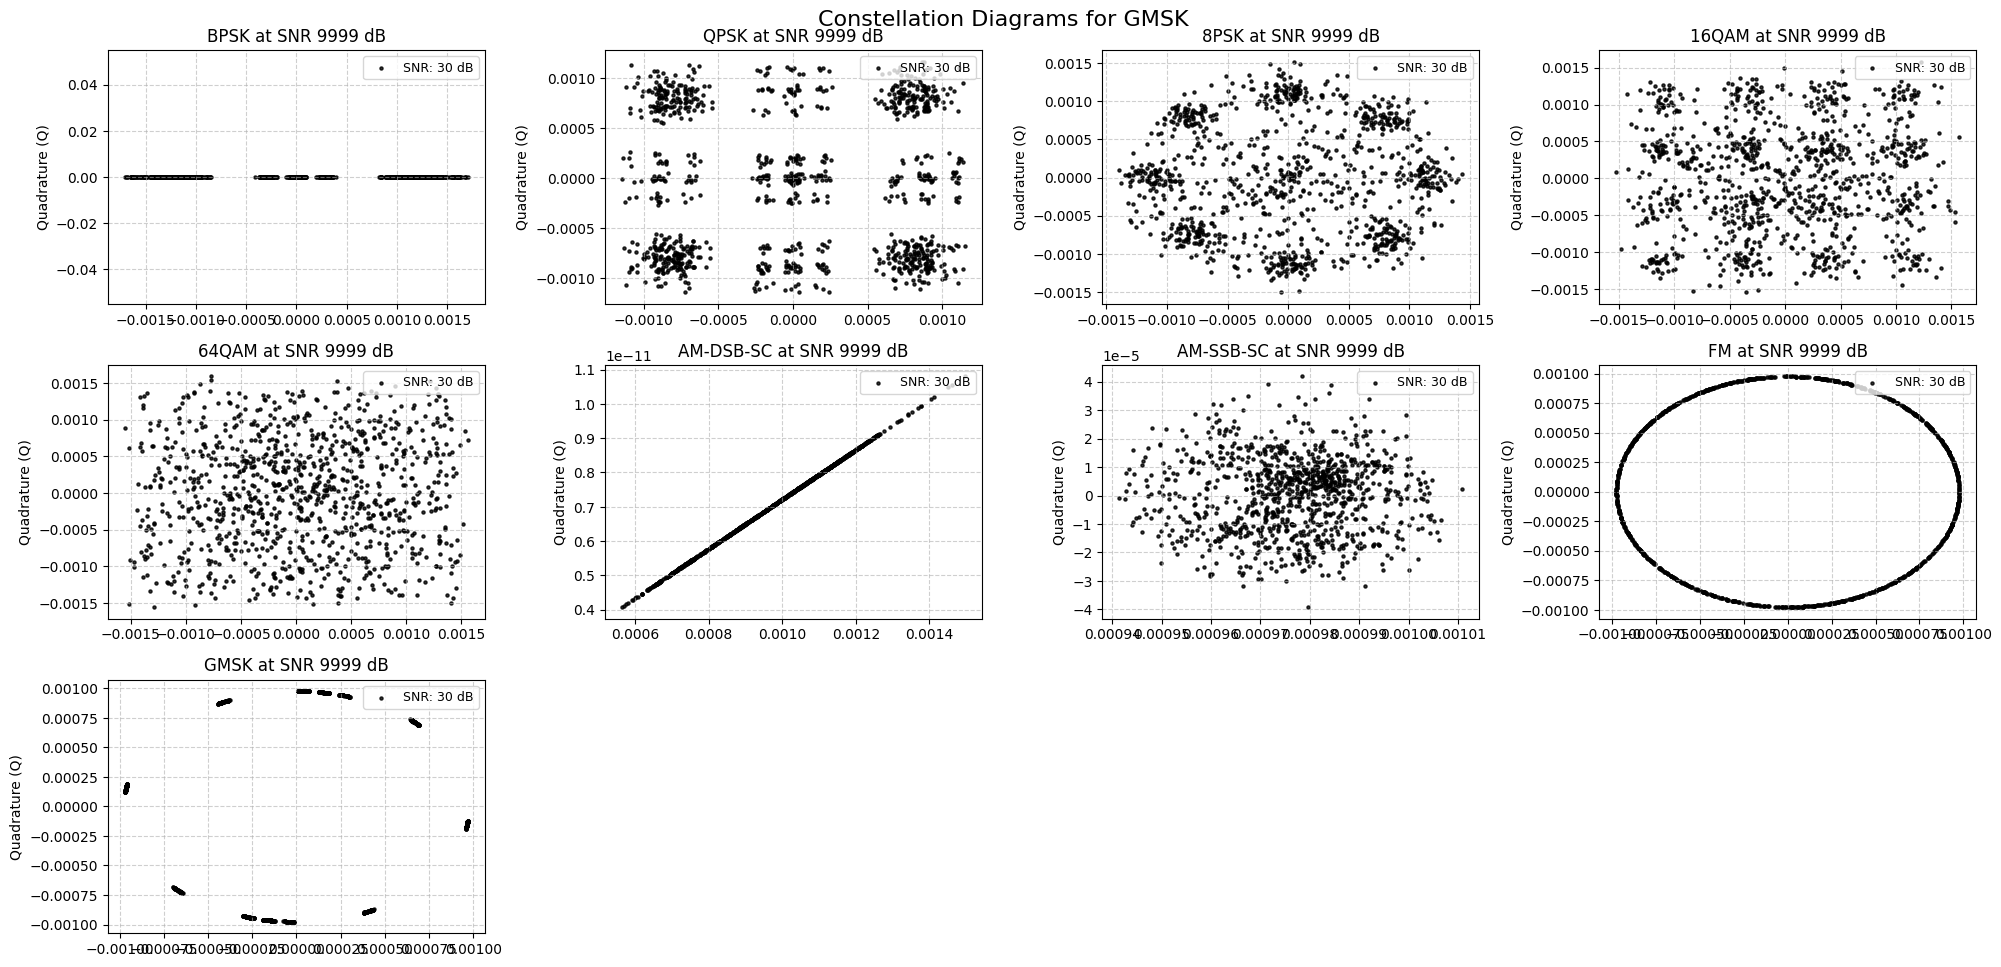

In [18]:
############################## PLOTTING TO CHECK THE COMBINED DATA #############################
#############################################################################################
############################## PLOTTING TO CHECK THE DATA #############################
#############################################################################################
from matplotlib import pyplot as plt

def plot_constellation(modulation_classes, snr_value, data):
    plt.figure(figsize=(20, 16))
    for i, modulation_class in enumerate(modulation_classes):
        key = (modulation_class, snr_value)
        if key in data:
            values = data[key]
            # print(values.shape)
            # break
            I_values = values[:1, :, 0].flatten()  # for one instance change the x index
            Q_values = values[:1, :, 1].flatten()

            ax = plt.subplot(5, 4, i + 1)
            ax.scatter(I_values, Q_values, s=5, alpha=0.8, color='black', label=f'SNR: {snr} dB')
            ax.set_title(f"{modulation_class} at SNR {snr_value} dB", fontsize=12)
            ax.set_ylabel("Quadrature (Q)", fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend(fontsize=9, loc='upper right')
        else:
            print(f"Key {key} not found in data.")

    plt.suptitle(f"Constellation Diagrams for {modulation_class}", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.tight_layout()
    plt.show()


mod_class = ['BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK']
snr_values = 9999
plot_constellation(mod_class, snr_values, data_orig)

In [19]:
combined_dataset_path = "GOLD_XYZ_OSC_POSITIVE_COMBINED.hdf5"

In [20]:
orig_mapped_classes_index = {
    'BPSK': 0,
    'QPSK': 1,
    '8PSK': 2,
    '16QAM': 3,
    '64QAM': 4,    
    'AM-DSB-SC': 5,
    'AM-SSB-SC': 6,
    'FM': 7,
    'GMSK': 8
}

X_list = []
Y_list = []
Z_list = []

for modulation, snr in data_orig.keys():
    mapped_class = orig_mapped_classes_index[modulation]
    data = data_orig[(modulation, snr)]
    X_list.append(data)
    Y_list.append(np.full(data.shape[0], mapped_class))
    Z_list.append(np.full(data.shape[0], snr))

X_total = np.concatenate(X_list, axis=0)
Y_total = np.concatenate(Y_list, axis=0)
Z_total = np.concatenate(Z_list, axis=0)

with h5py.File(combined_dataset_path, 'w') as output_file:
    output_file.create_dataset('X', data=X_total, compression='gzip')
    output_file.create_dataset('Y', data=Y_total, compression='gzip')
    output_file.create_dataset('Z', data=Z_total, compression='gzip')


In [21]:
import h5py
total_dataset_path = "/kaggle/working/GOLD_XYZ_OSC_POSITIVE_COMBINED.hdf5"

with h5py.File(total_dataset_path, 'r') as file:
        X = file['X'][:]  # IQ samples
        Y = file['Y'][:]  # Class indices (already mapped to contiguous indices)
        Z = file['Z'][:]  # SNR values

In [22]:
all_classes = [
    'OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK',
    '16APSK', '32APSK', '64APSK', '128APSK', '16QAM', '32QAM',
    '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC',
    'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK'
]

# Plot constellation diagrams for the extracted dataset
def plot_constellation_snr_levels(modulation_class_index, extracted_classes, X, Y, Z):
        # Get modulation class name from extracted_classes
        class_name = extracted_classes[modulation_class_index]

        # Find indices of the target modulation class
        selected_class_indices = np.where(Y == modulation_class_index)[0]

        # Get unique SNR levels
        snr_values = np.unique(Z)

        # Plot constellation diagrams for all SNR levels
        plt.figure(figsize=(16, 20))
        for i, snr in enumerate(snr_values):
            # Find indices corresponding to the current SNR level
            snr_indices = selected_class_indices[np.where(Z[selected_class_indices] == snr)[0]]

            if len(snr_indices) == 0:
                continue

            # Extract the first sample for the current SNR level
            iq_samples = X[snr_indices[0]]
            # print(iq_samples.shape)
            # break
            # Separate into in-phase (I) and quadrature (Q) components
            I = iq_samples[:, 0].flatten()
            Q = iq_samples[:, 1].flatten()

            # Plot the scatter plot
            ax = plt.subplot(5, 4, i + 1)
            ax.scatter(I, Q, s=5, alpha=0.8, color='black')
            ax.set_title(f"SNR: {snr}dB", fontsize=10)
            ax.axis('off')

        # plt.suptitle(f"Constellation Diagrams for Class {class_name}", fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.savefig(f"constellation{classes[modulation_class_index]}.pdf", format="pdf")
        plt.show()


# Paths to extracted dataset and relevant parameters
classes = [
    'BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK'
]

# # Plot for the target class index (modulation class index in extracted_classes)
# modulation_class_index = 0  # Example: 'FM'

# plot_constellation_snr_levels(modulation_class_index, classes, X, Y, Z)

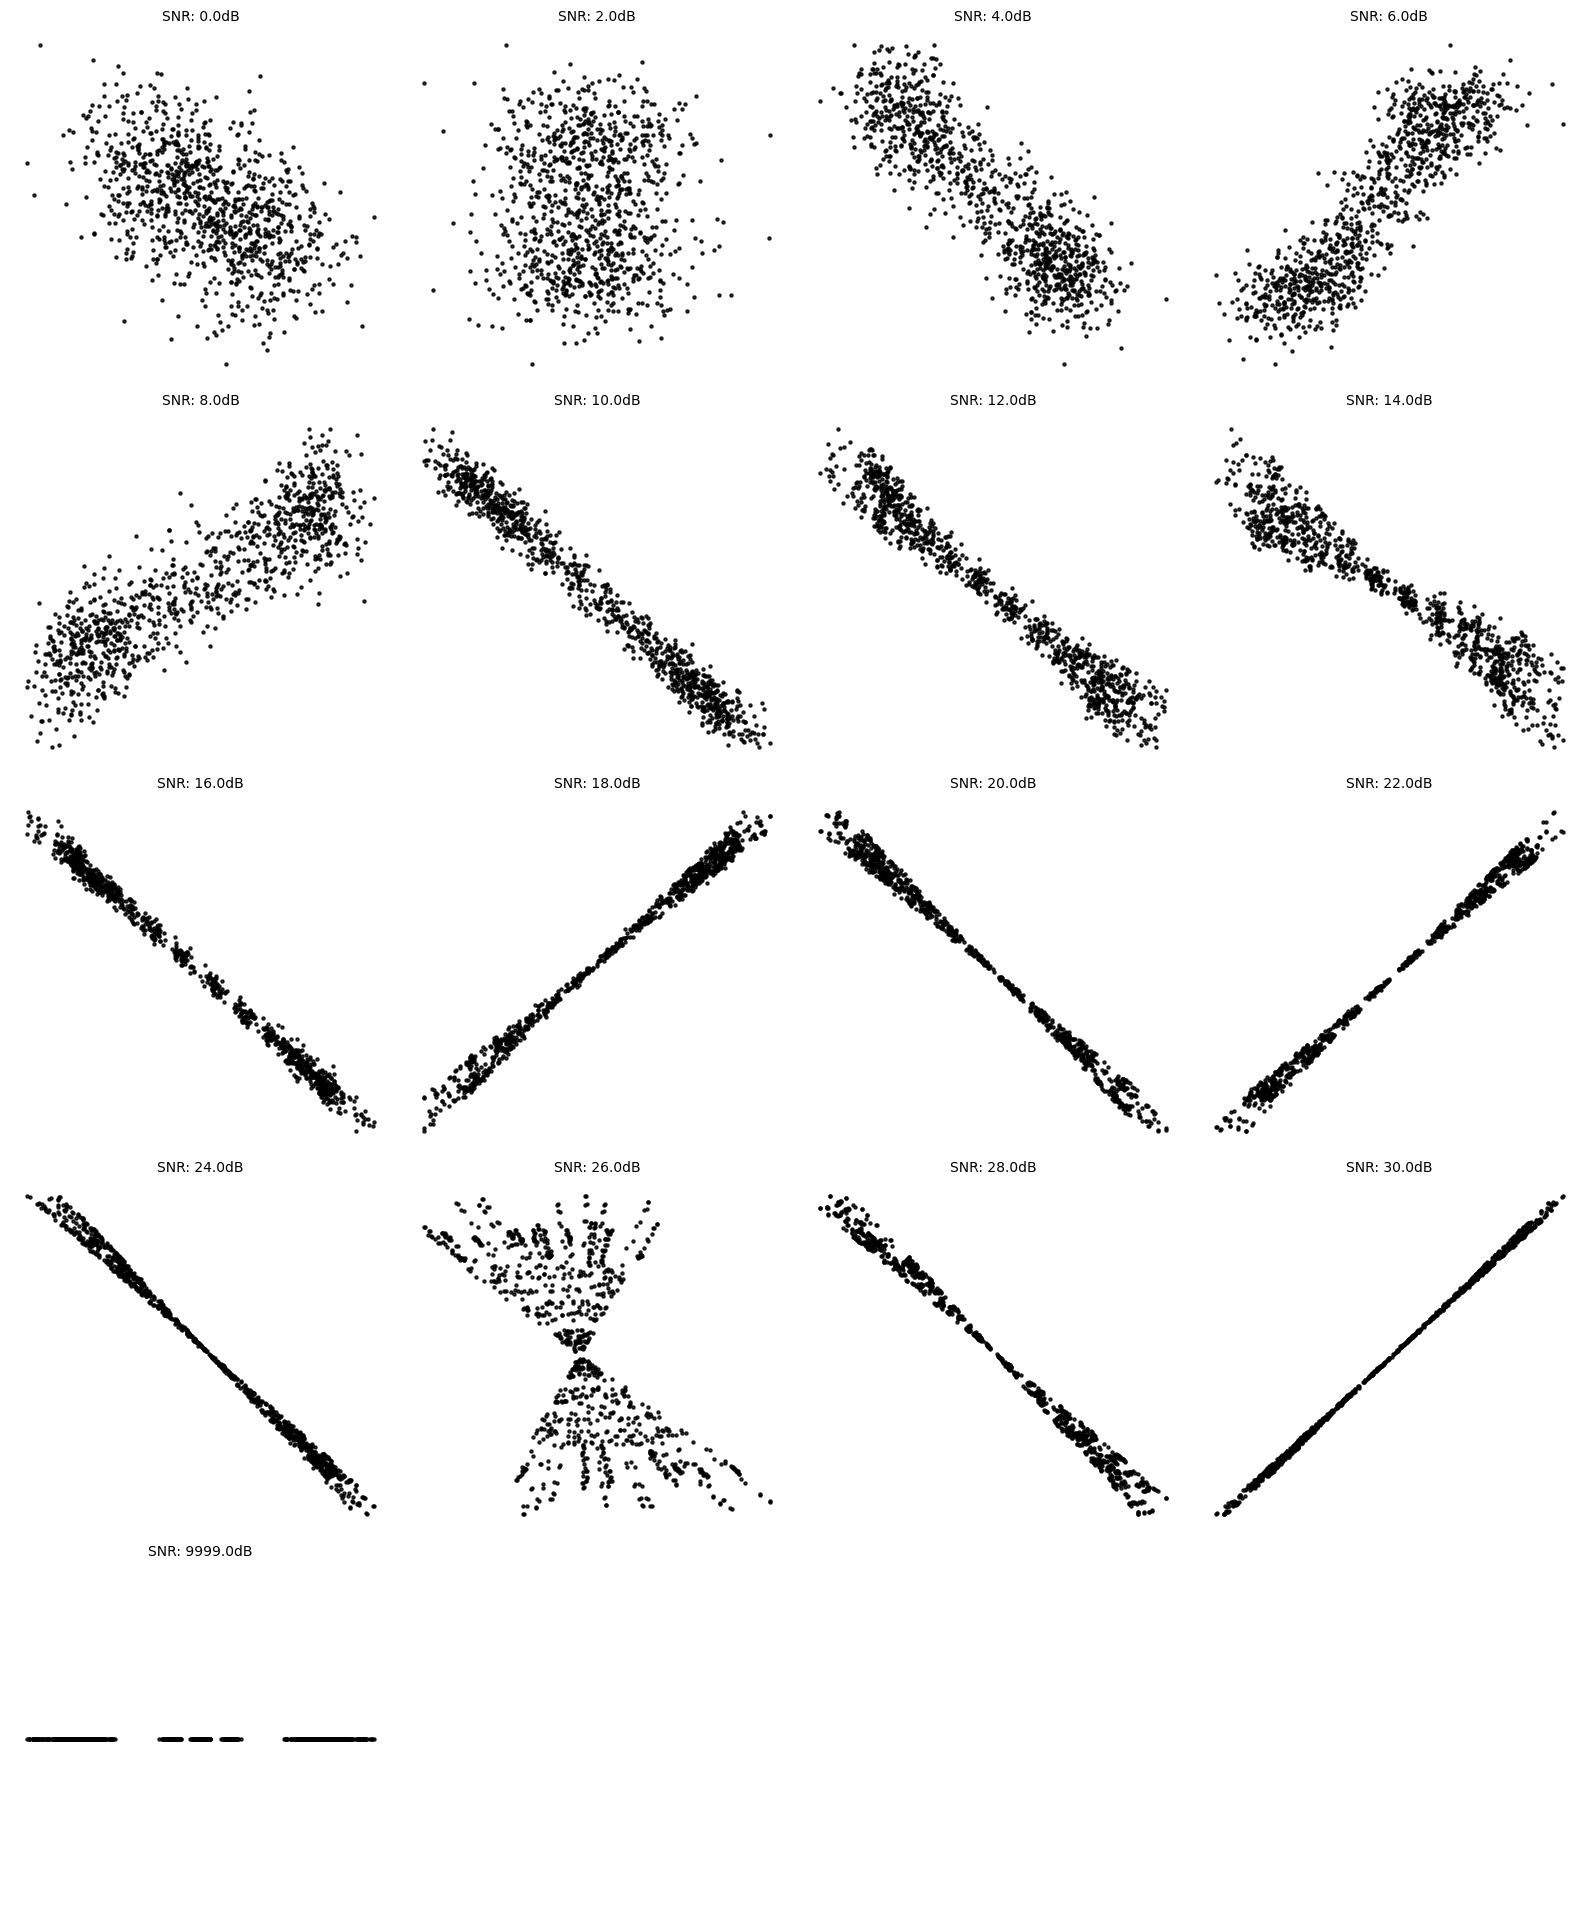

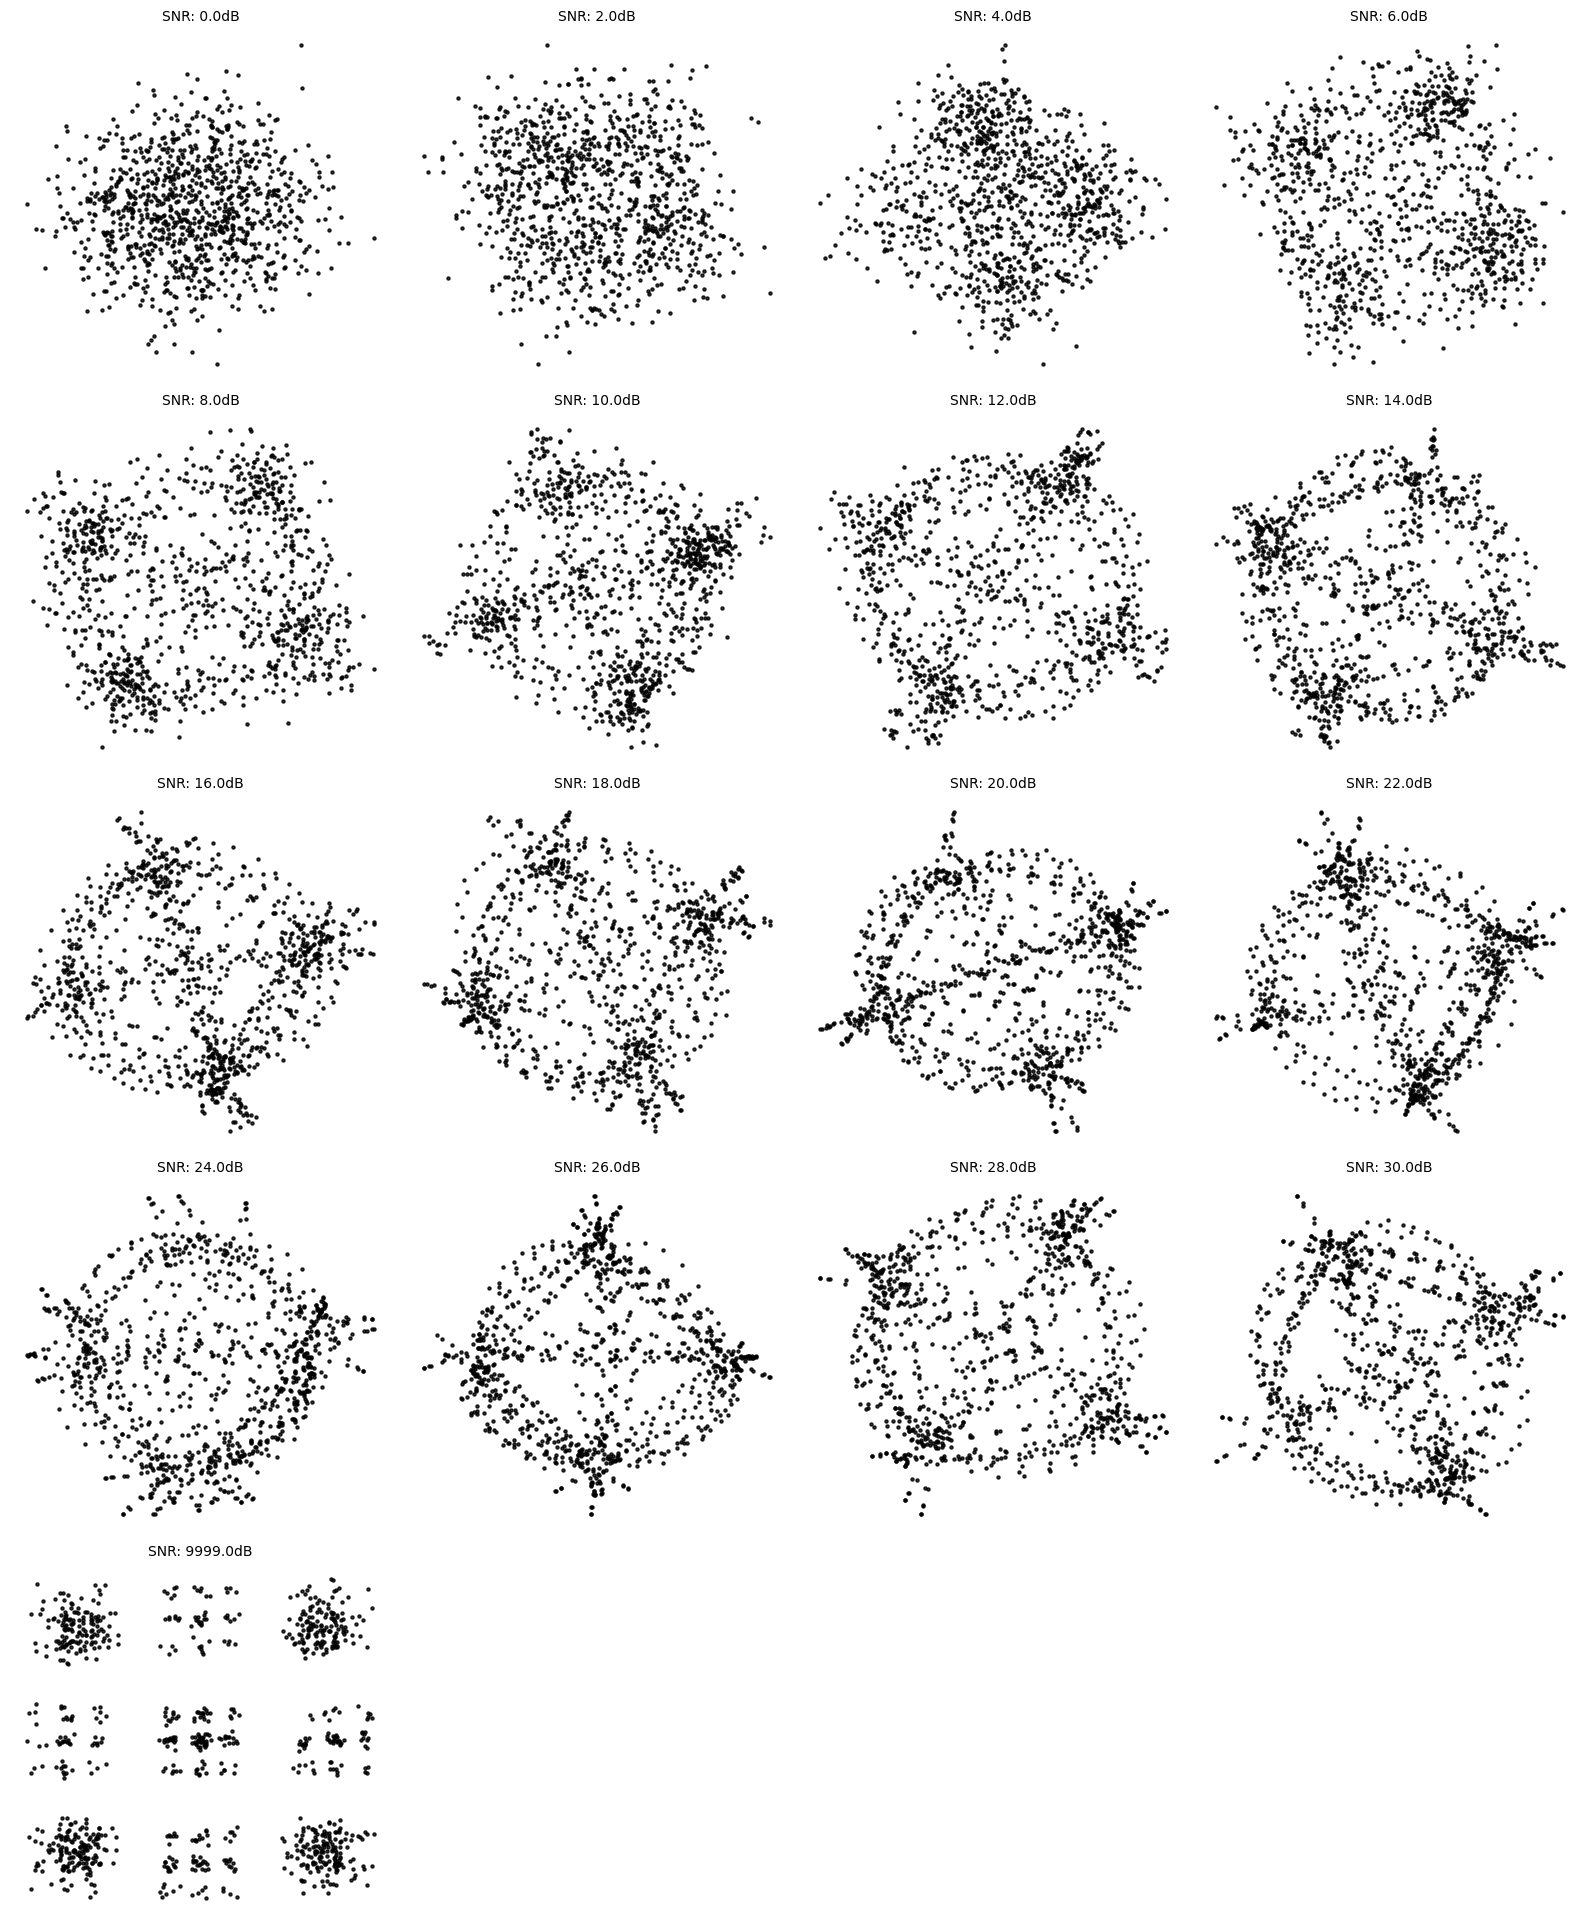

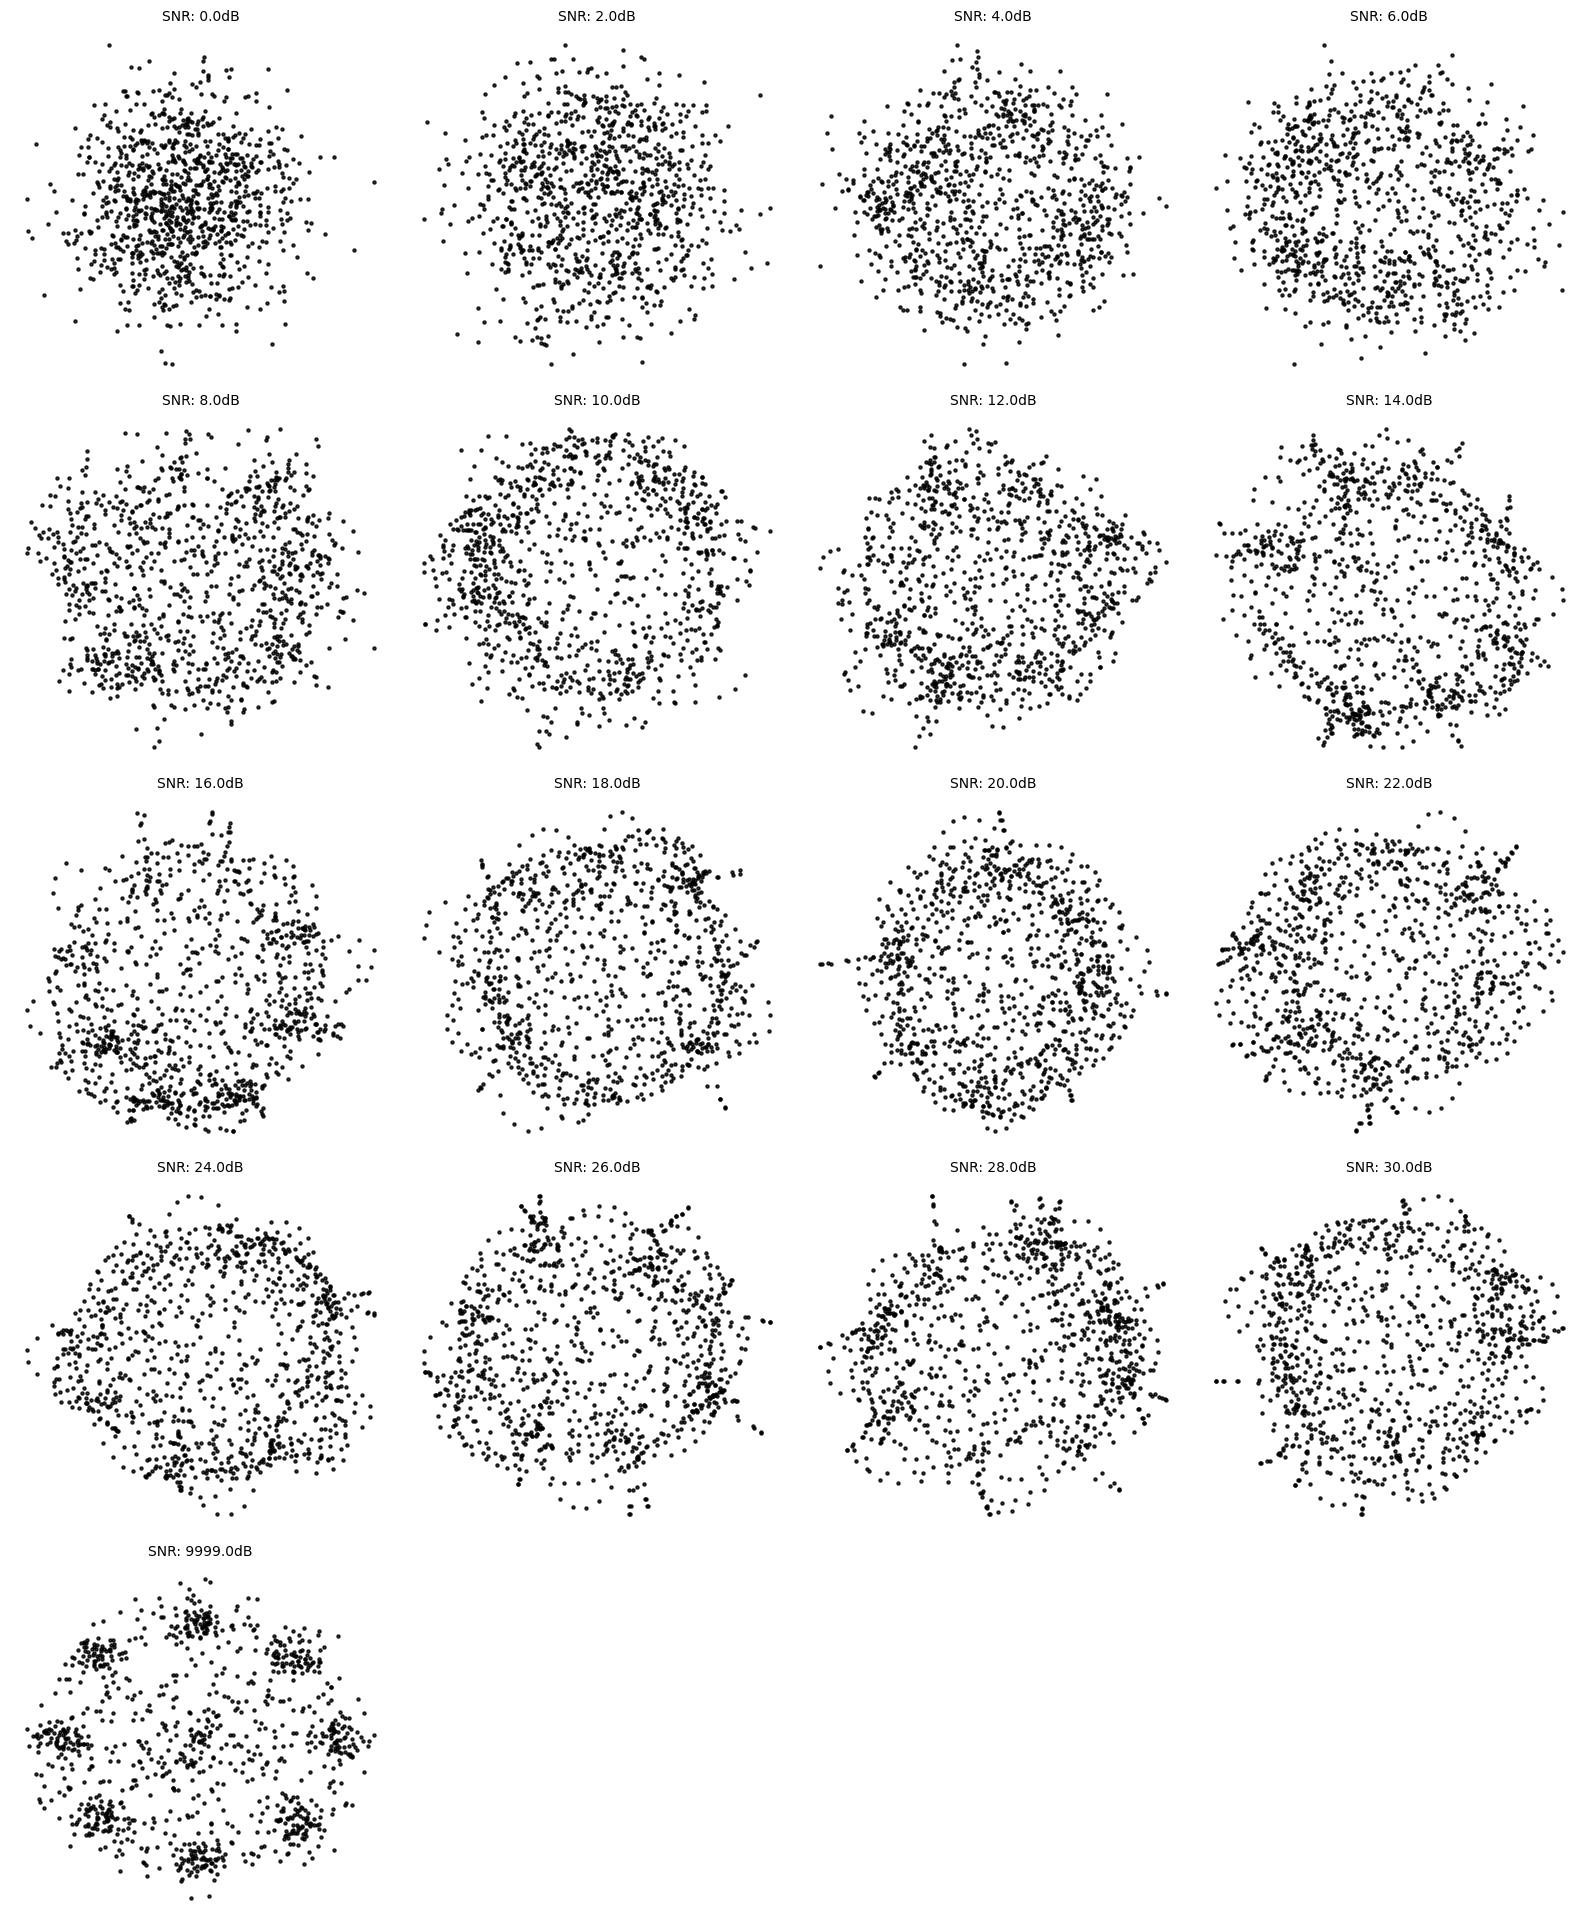

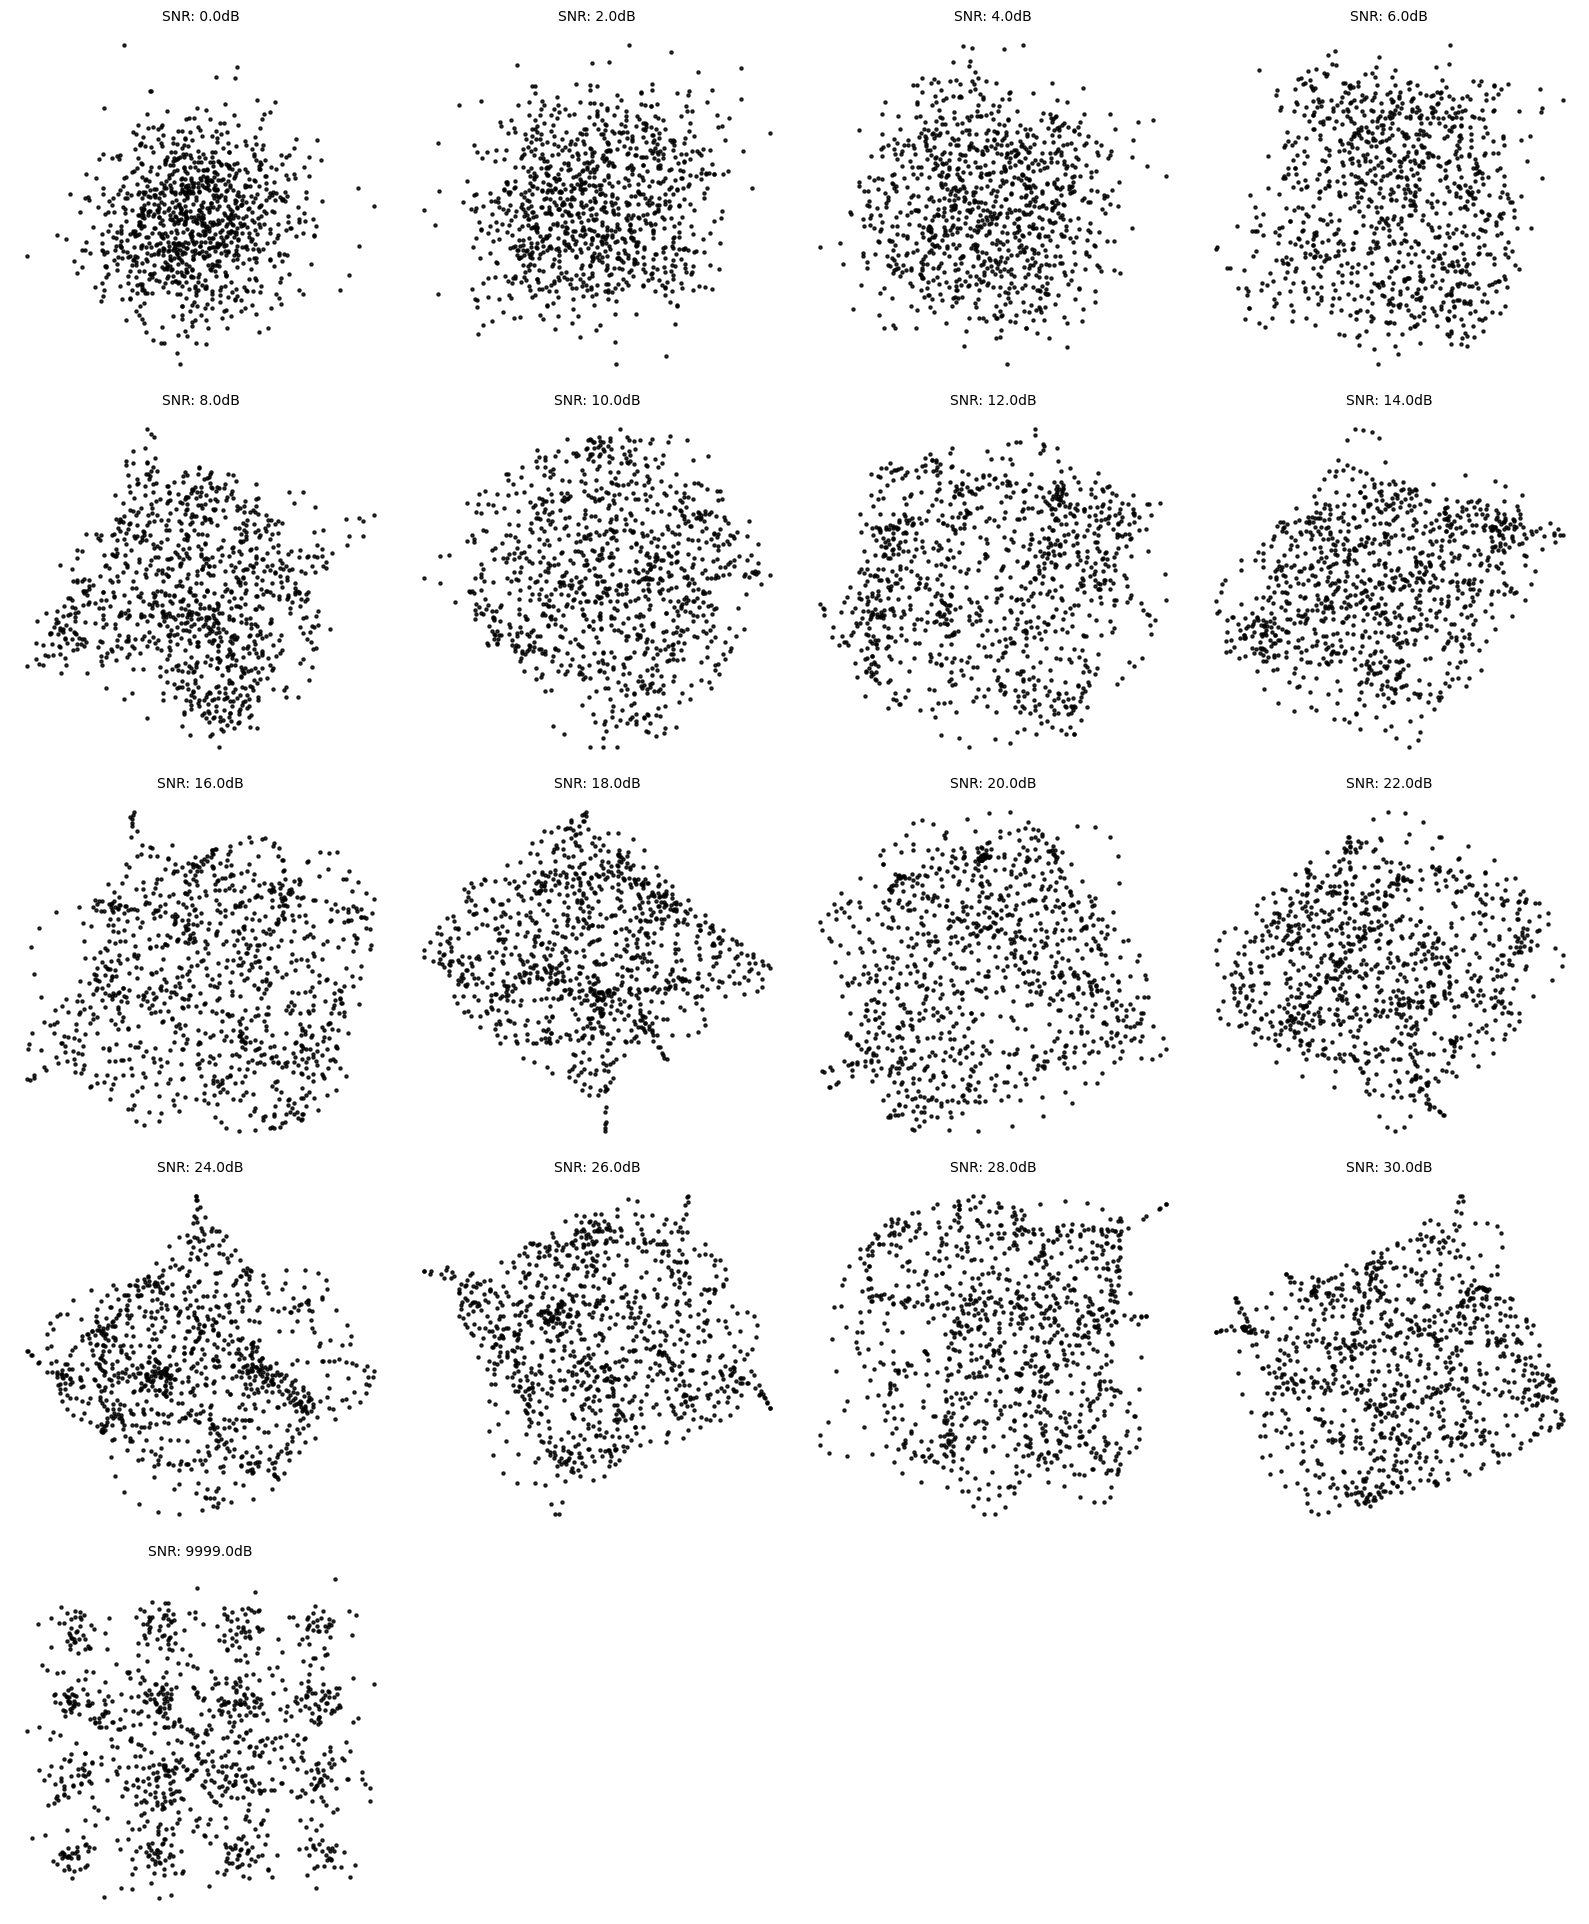

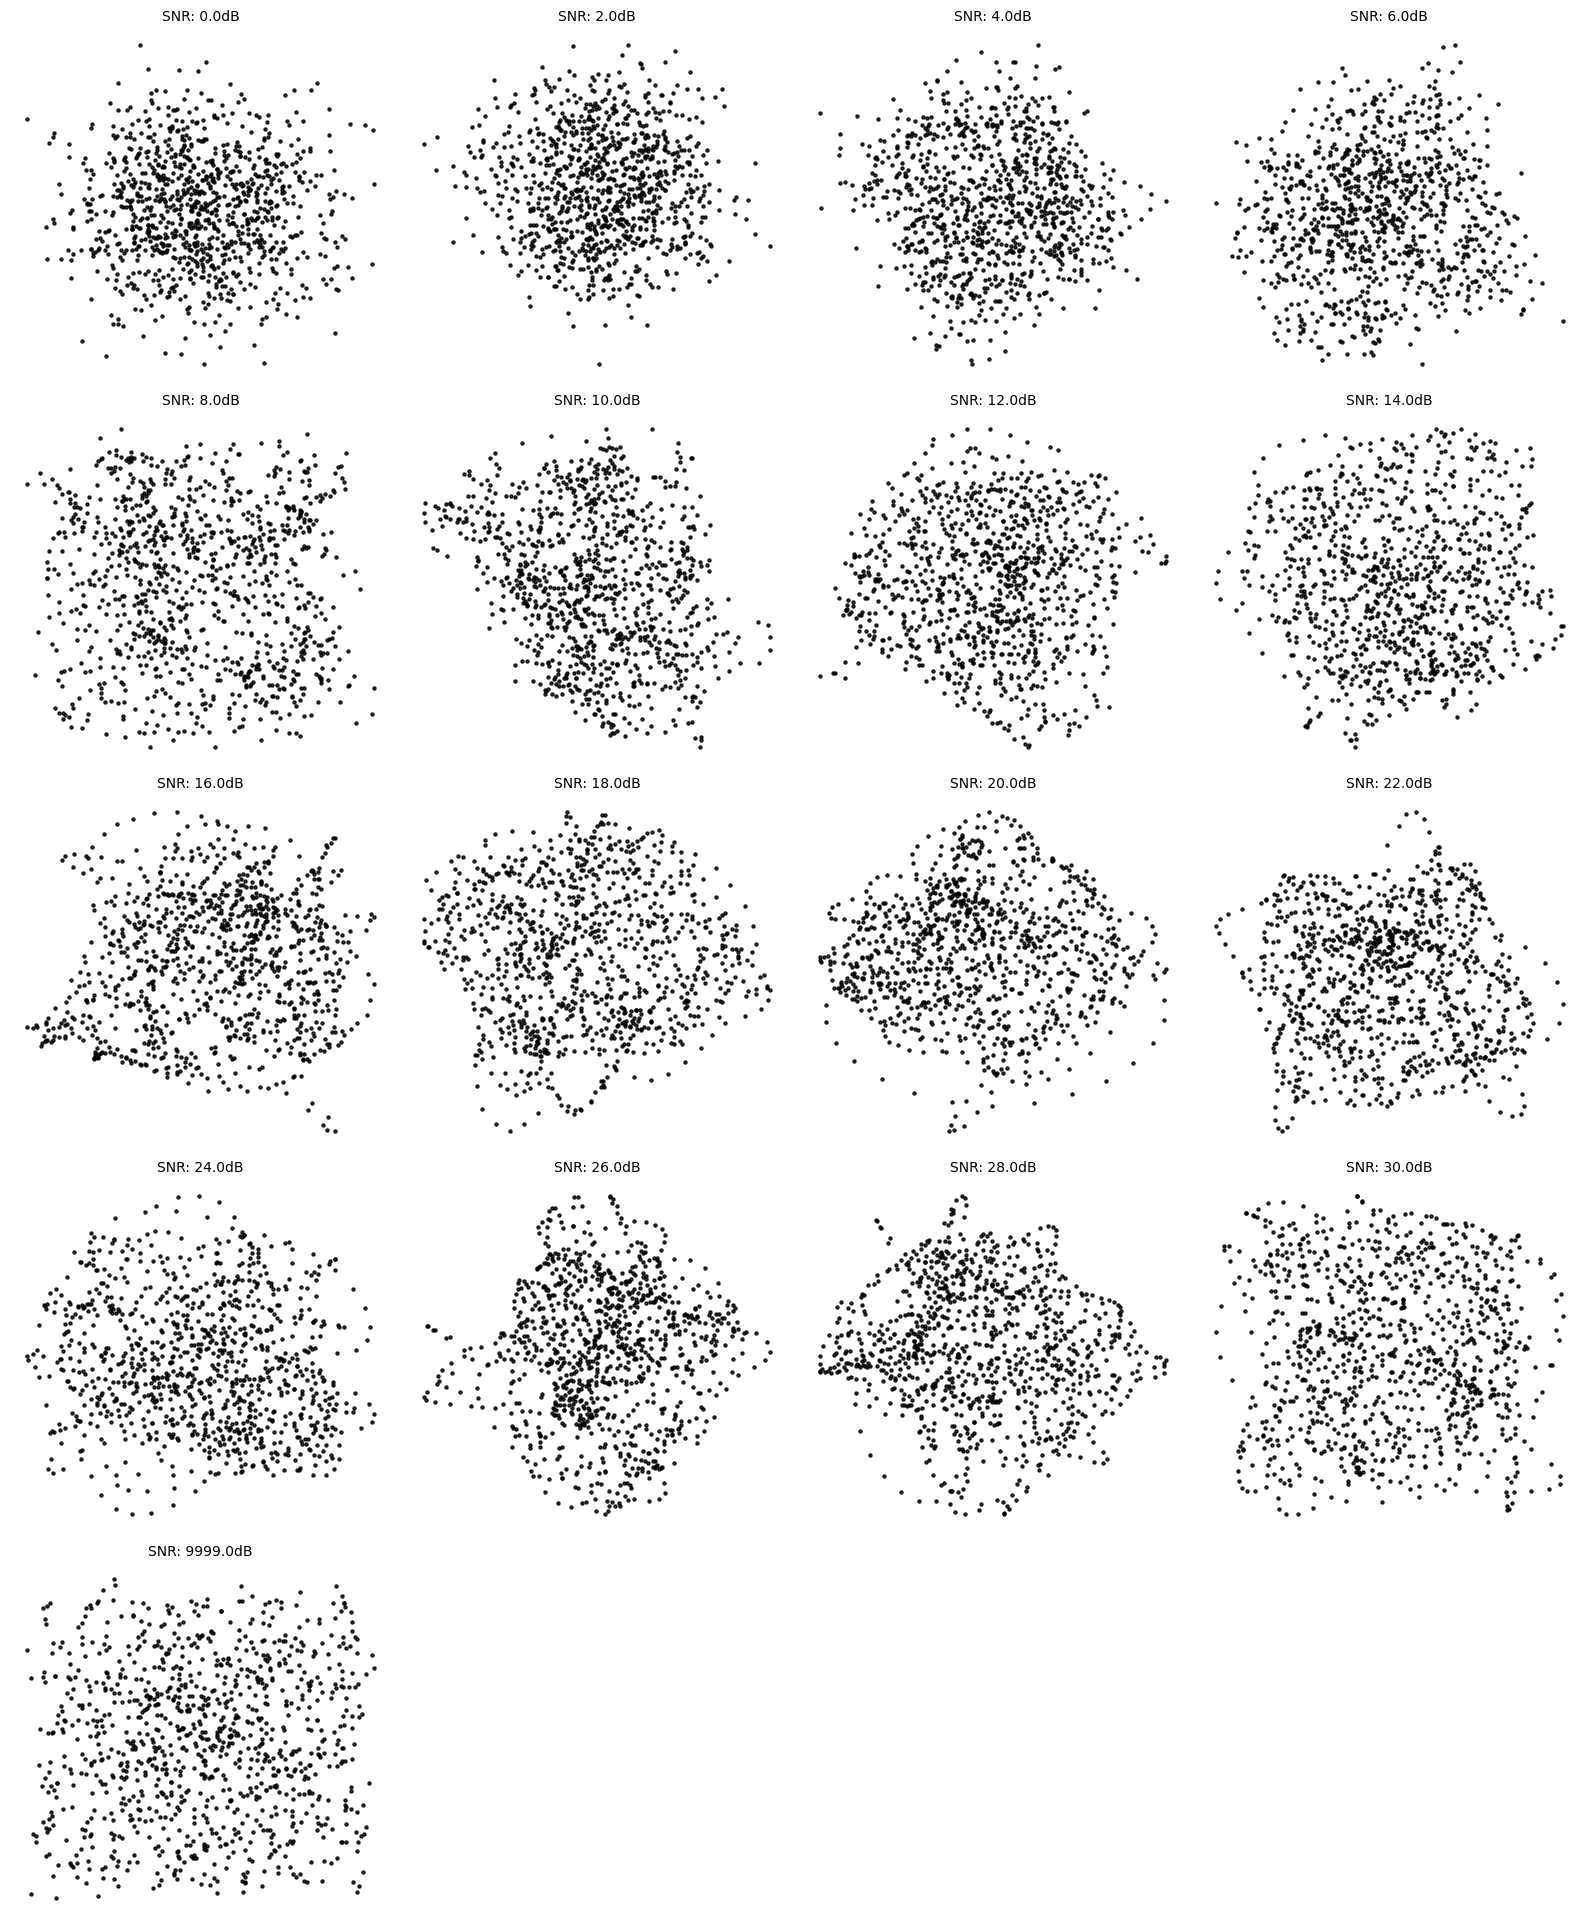

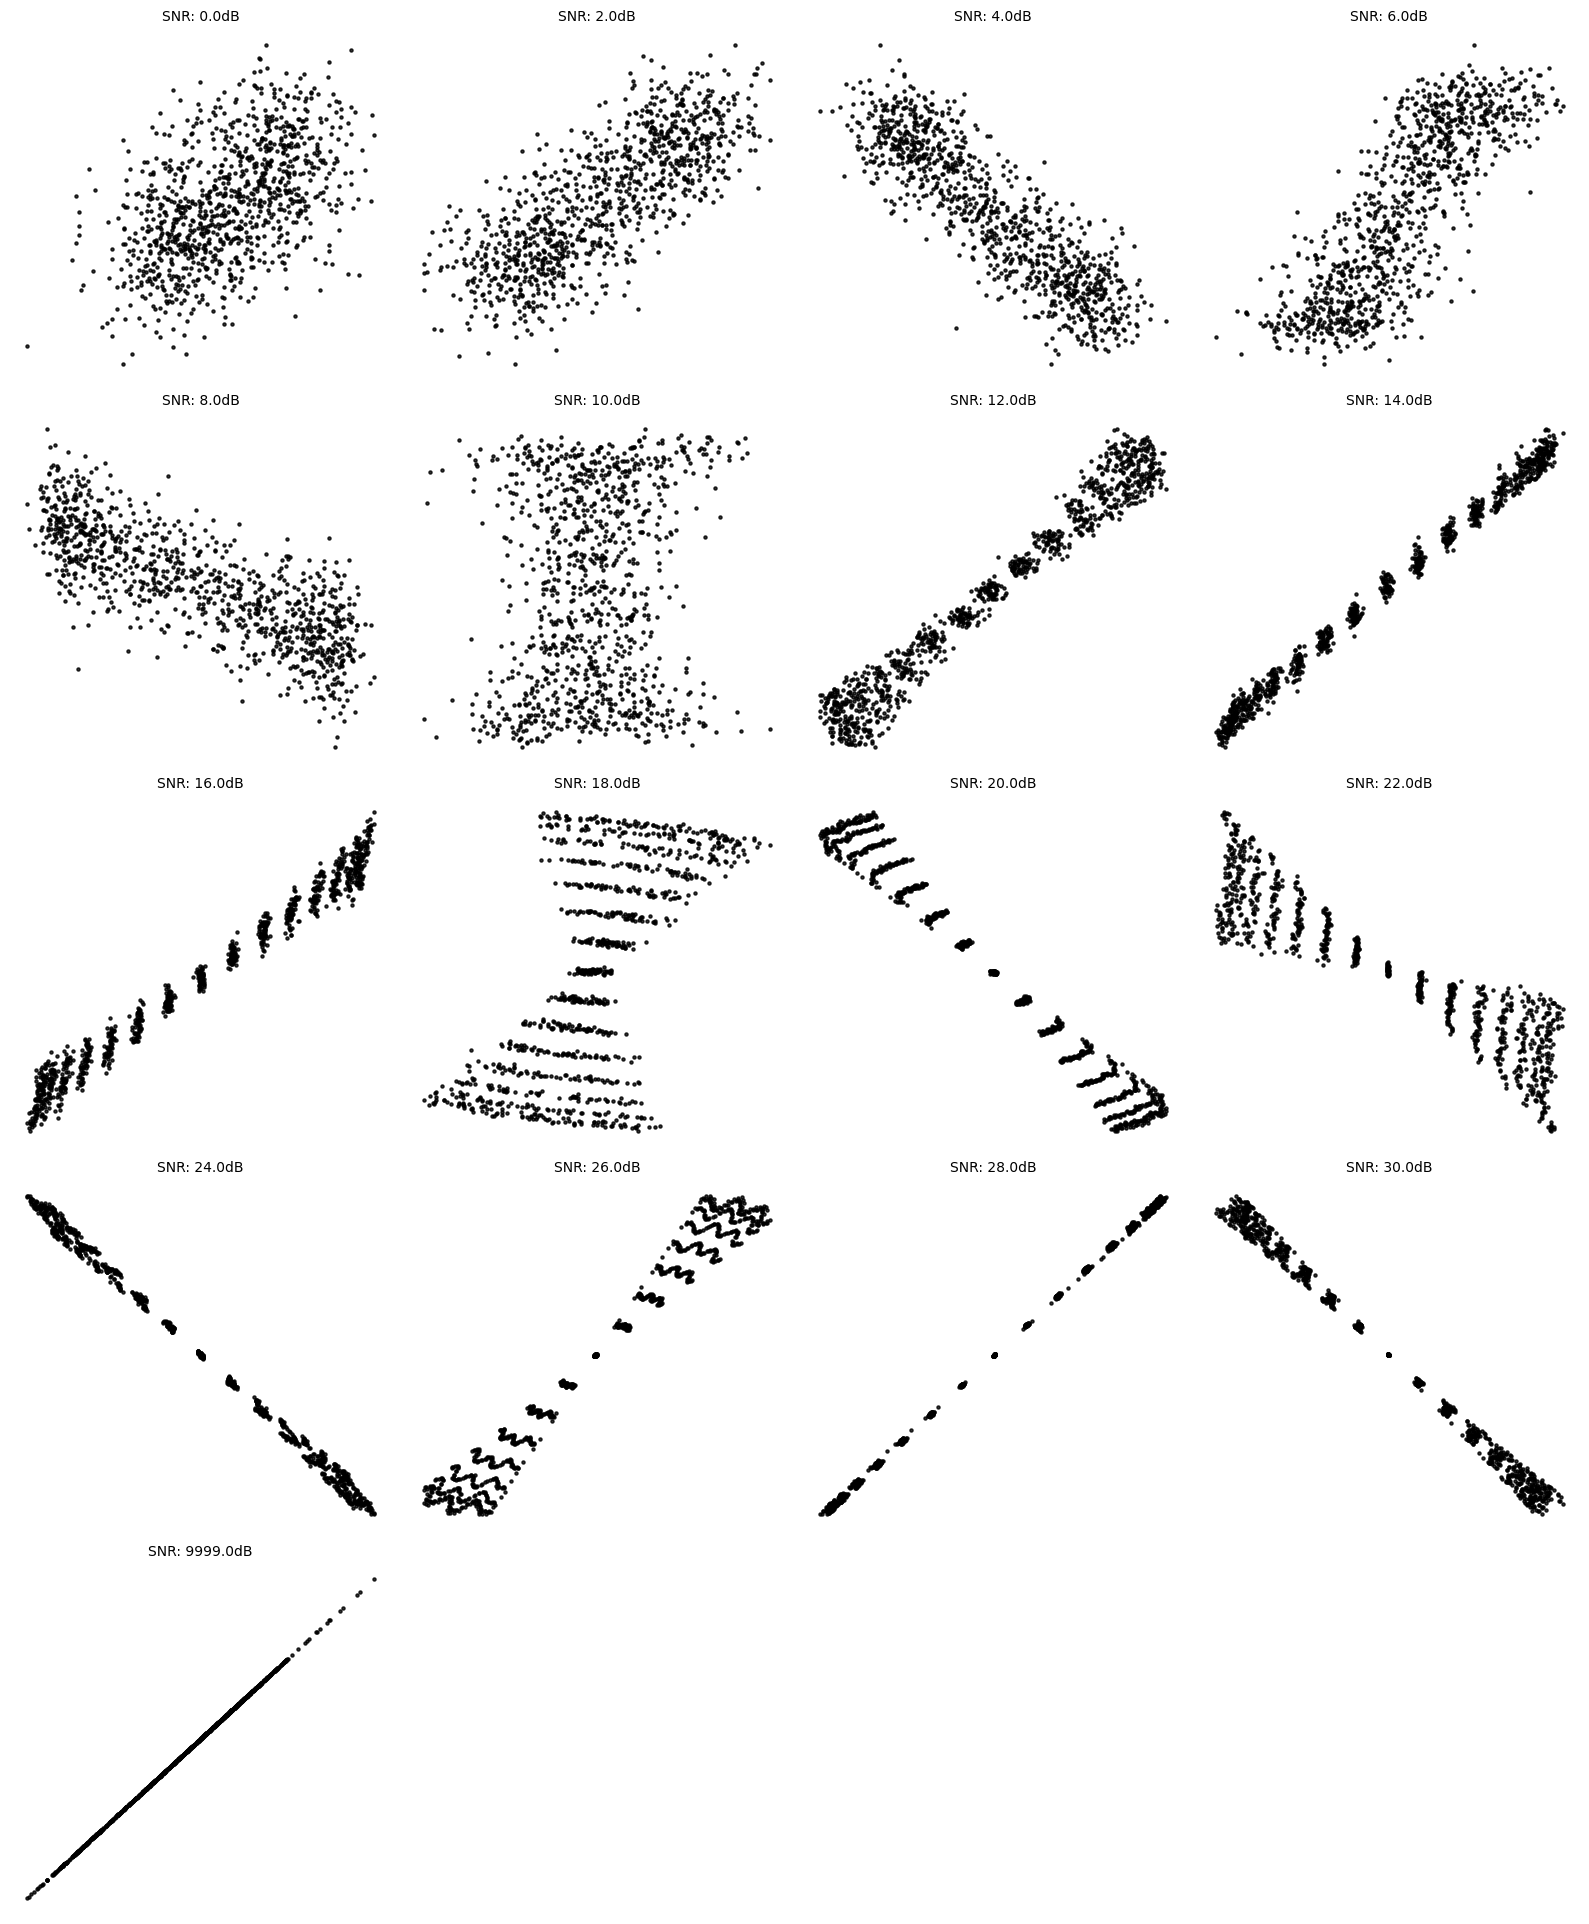

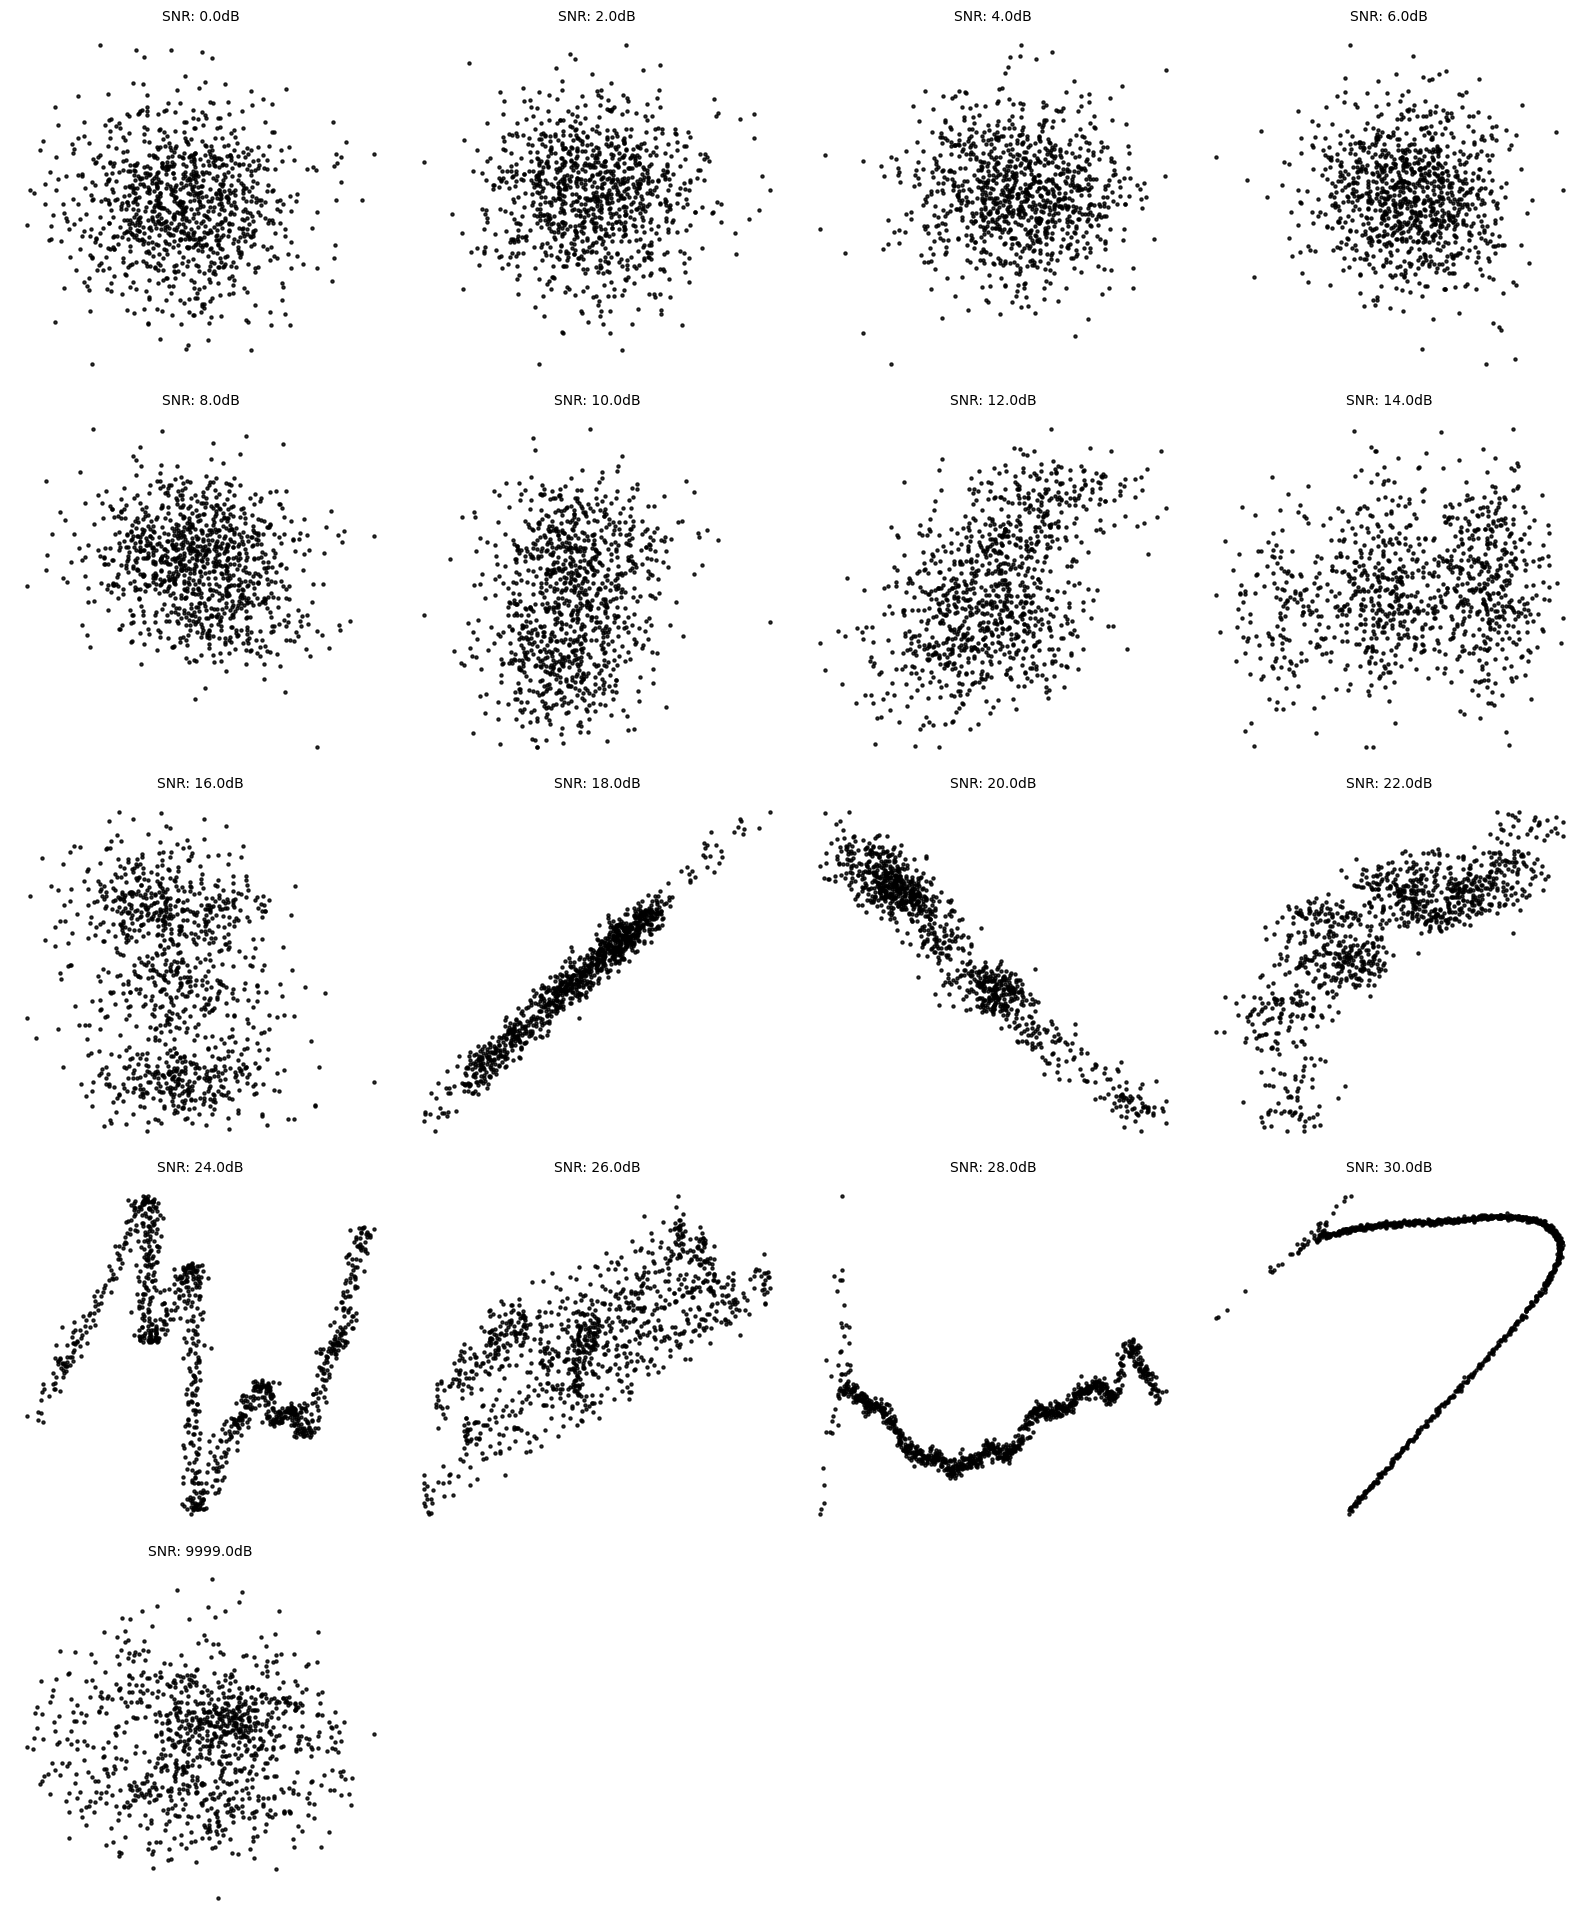

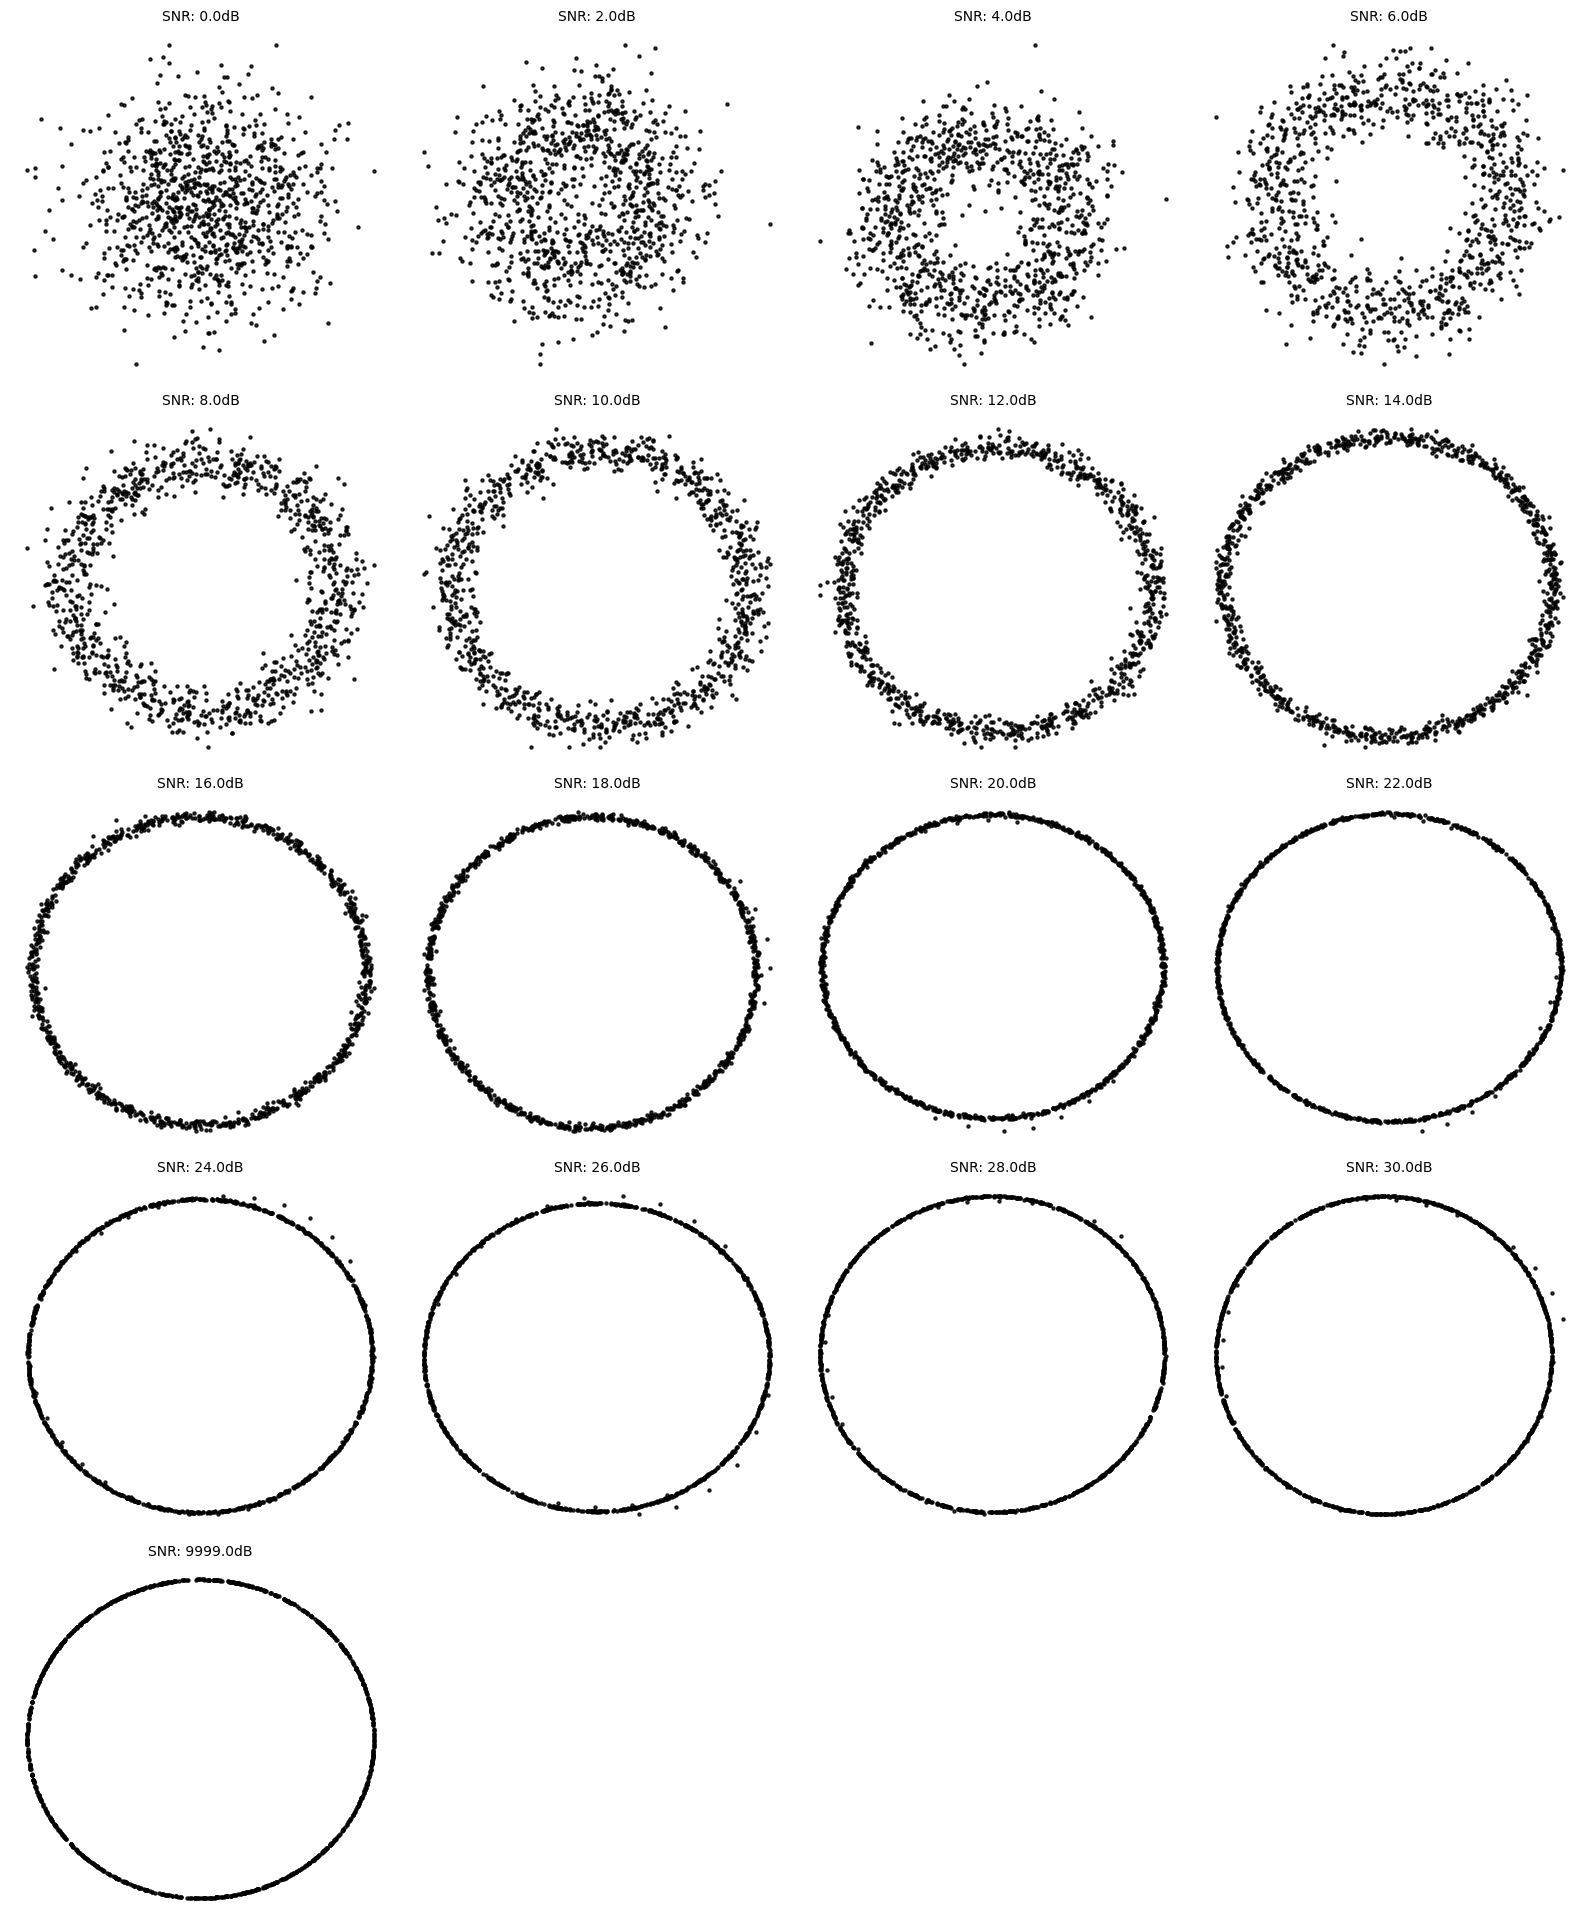

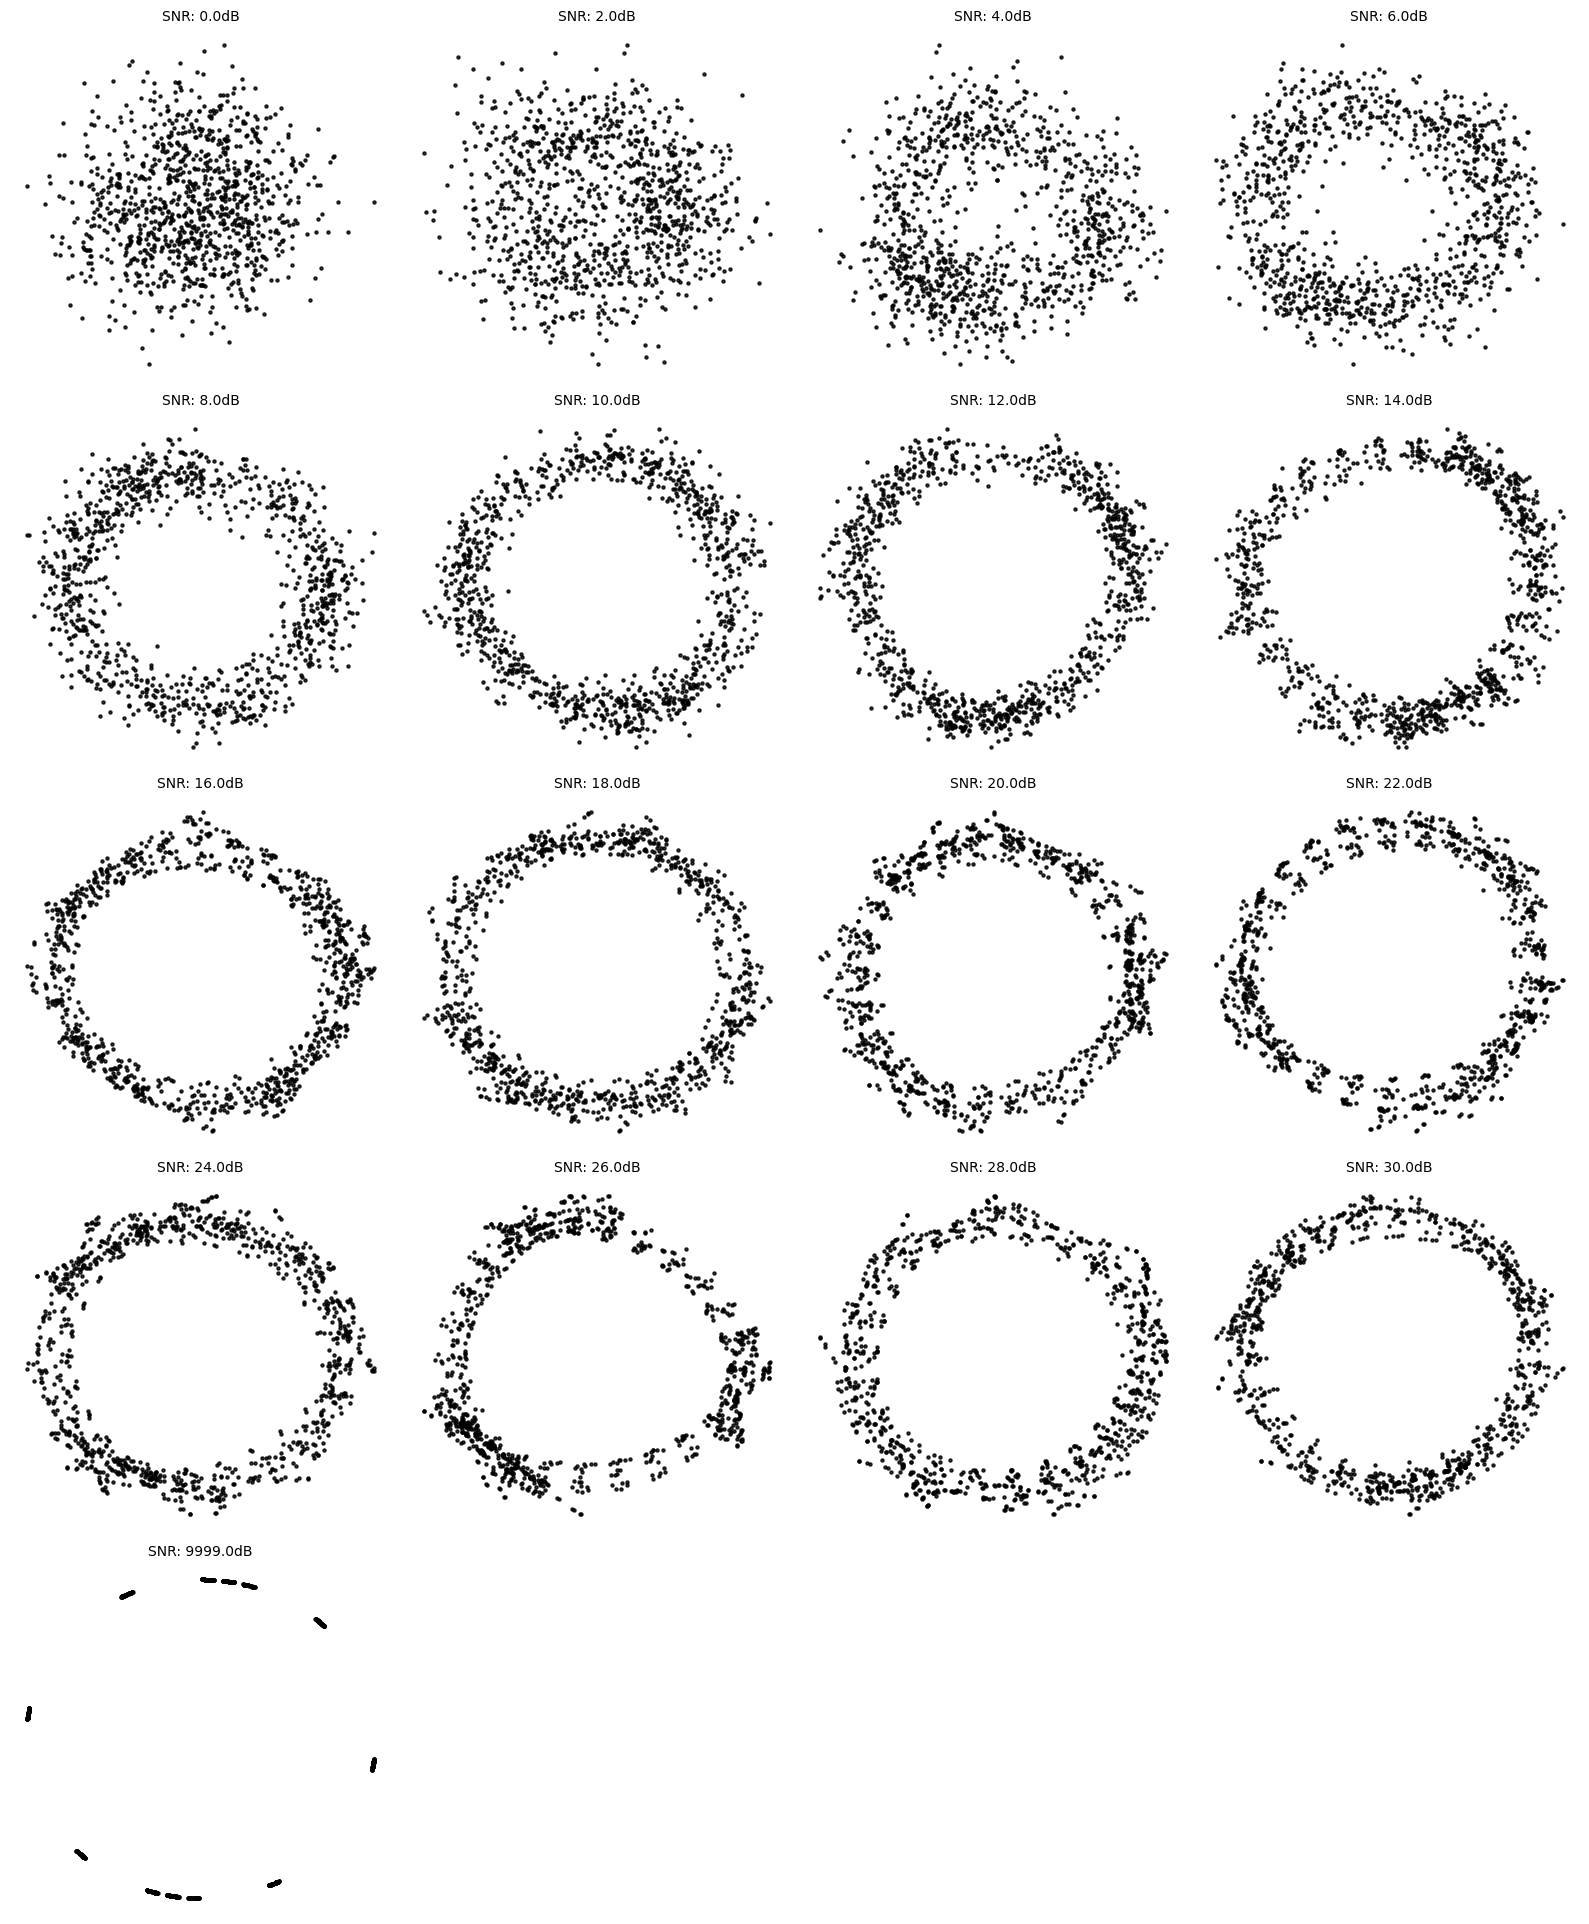

In [23]:
for modulation in range(9):
    plot_constellation_snr_levels(modulation, classes, X, Y, Z)

In [24]:
!ls /kaggle/working/

GOLD_XYZ_OSC_POSITIVE_COMBINED.hdf5  constellationAM-SSB-SC.pdf
__notebook__.ipynb		     constellationBPSK.pdf
constellation16QAM.pdf		     constellationFM.pdf
constellation64QAM.pdf		     constellationGMSK.pdf
constellation8PSK.pdf		     constellationQPSK.pdf
constellationAM-DSB-SC.pdf
